### Environment Set Up

In [2]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Loading

In [3]:
theme_dict = {
    "AI": {
        "prices": "AIQ",
        "sentiment": "Data Science/ML/AI"
    },
    "Cybersecurity": {
        "prices": "CIBR",
        "sentiment": "Cyber Security"
    },
    "Social Media": {
        "prices": "SOCL",
        "sentiment": "Social Media"
    },
    "EV": {
        "prices": "ECAR.L",
        "sentiment": "Electric Vehicles"
    },
    "Transistors": {
        "prices": "SOXX",
        "sentiment": "Transistors"
    },
    "Cloud Computing": {
        "prices": "CLOU",
        "sentiment": "Cloud Computing"
    },
    "Streaming": {
        "prices": "BNGE",
        "sentiment": "Streaming"
    },
    "VR": {
        "prices": "VR",
        "sentiment": "AR/VR"
    },
    "TNX": {
        "prices": "TNX",
        "sentiment": None
    },
    "Market": {
        "prices": "GSPC",
        "sentiment": None
    }
}

# directory for prices data
prices_dir = "GetStockData"
# sentiment data
sentiment_file_path = "Theme_Sentiment_Results.csv"

In [4]:
pd.read_csv(sentiment_file_path)["theme"].unique()

array(['Social Media', 'Smartphone', 'Streaming', 'Smartwatch',
       'Transistors', 'Electric Vehicles', 'AR/VR', 'Cyber Security',
       'Data Science/ML/AI', 'Cloud Computing'], dtype=object)

### Price and Theme Sentiment Analysis Functions

In [5]:
def get_prices_data(theme):
  file_path = "{}/{}.csv".format(prices_dir, theme_dict[theme]["prices"])
  df = pd.read_csv(file_path)
  columns = df.columns
  df.rename(columns={col: col.lower() for col in columns}, inplace=True)
  df["date"] = pd.to_datetime(df["date"])
  df.sort_values(by="date", inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df

def get_sentiment_data(theme):
  df = pd.read_csv(sentiment_file_path)
  columns = df.columns
  df.rename(columns={col: col.lower() for col in columns}, inplace=True)
  df = df[df["theme"] == theme_dict[theme]["sentiment"]]
  df1 = df.groupby("date")[["sentiment_score", "confidence"]].mean().reset_index()
  df2 = df.groupby("date")["theme"].count().reset_index()
  df2.rename(columns={"theme": "theme_freq"}, inplace=True)

  df["positive"] = np.where(df["sentiment_result"] == "positive", 1, 0)
  df["negative"] = np.where(df["sentiment_result"] == "negative", 1, 0)
  df3 = df.groupby("date")[["positive", "negative"]].sum().reset_index()
  df3["positive_frac"] = df3["positive"] / (df3["negative"] + df3["positive"])

  df = pd.merge(df1, df2, on="date").merge(df3, on="date")
  df["date"] = pd.to_datetime(df["date"])
  df.sort_values(by="date", inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df

In [6]:
themes = pd.read_csv(sentiment_file_path)["theme"].unique()
print(themes)

['Social Media' 'Smartphone' 'Streaming' 'Smartwatch' 'Transistors'
 'Electric Vehicles' 'AR/VR' 'Cyber Security' 'Data Science/ML/AI'
 'Cloud Computing']


In [7]:
theme_dict.keys()

dict_keys(['AI', 'Cybersecurity', 'Social Media', 'EV', 'Transistors', 'Cloud Computing', 'Streaming', 'VR', 'TNX', 'Market'])

### Theme Frequency Analysis

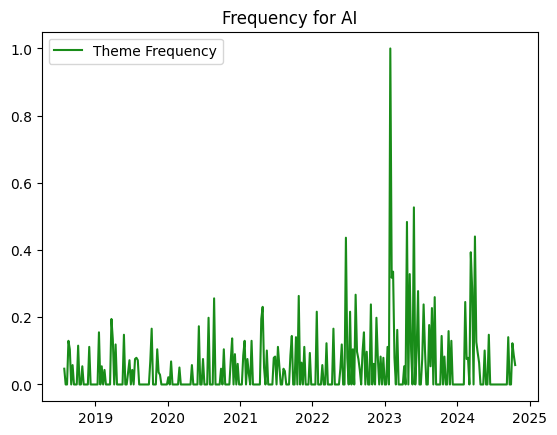

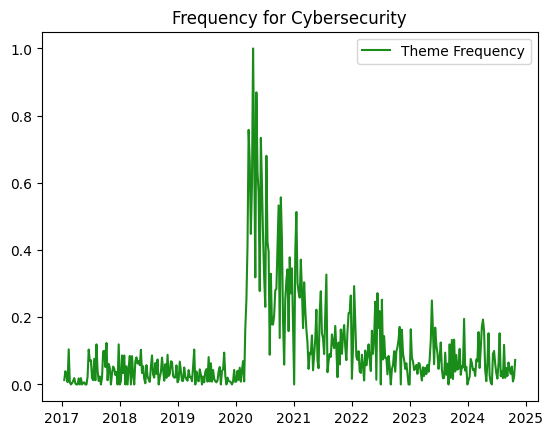

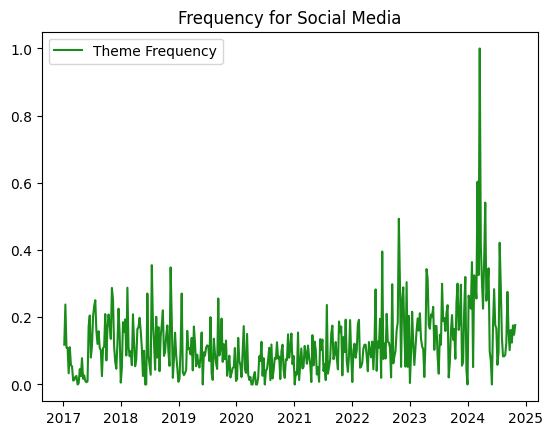

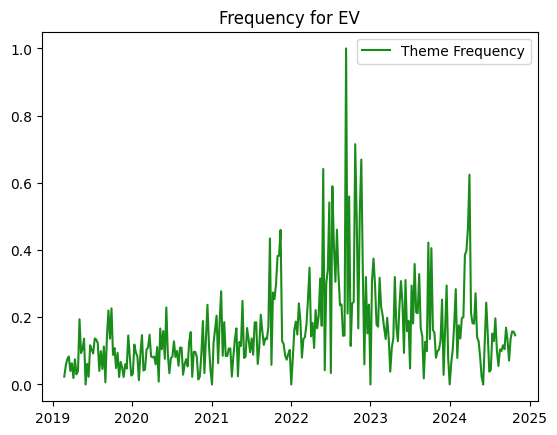

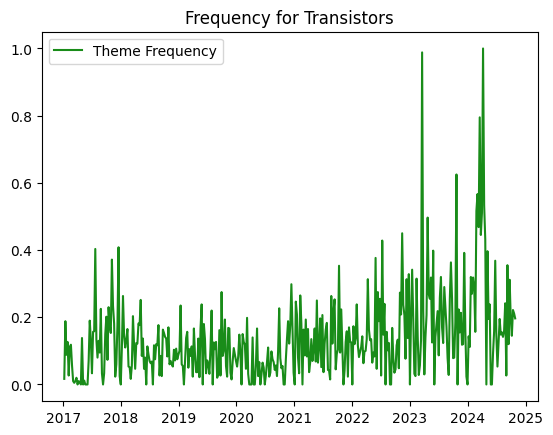

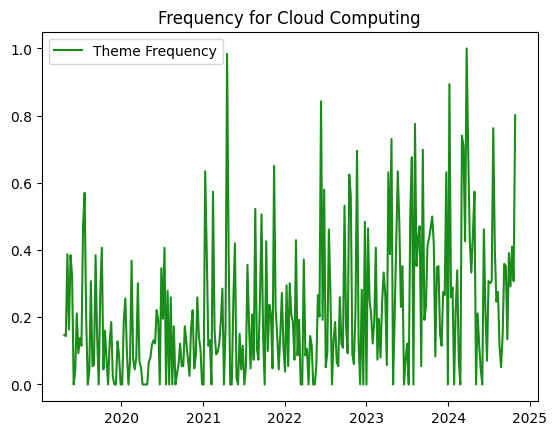

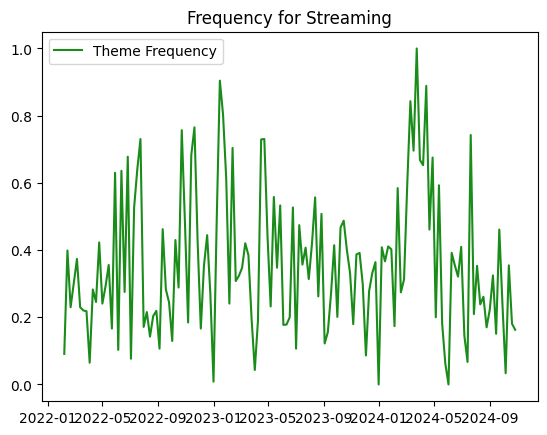

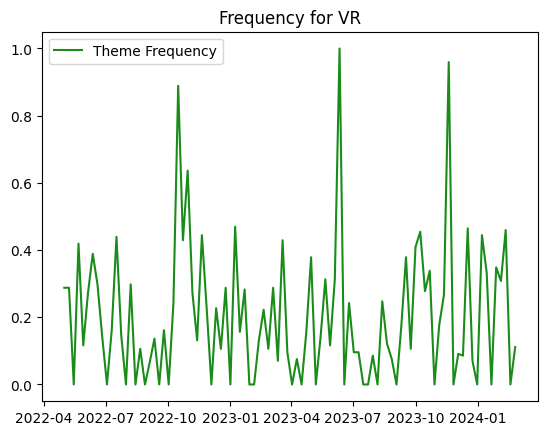

In [32]:
for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue
    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    weekly_vol_df = volume_df.resample('W').sum()
    weekly_vol_df.head()
    volume = weekly_vol_df['volume']/weekly_vol_df['volume'].max()
    theme_freq = weekly_vol_df['theme_freq']/weekly_vol_df['theme_freq'].max()
    #plt.plot(weekly_vol_df.index, volume, label = 'Trading Volume', color = 'black',alpha = 0.9)
    plt.plot(weekly_vol_df.index, theme_freq, label = 'Theme Frequency',color = 'green',alpha = 0.9)
    plt.title(f"Frequency for {t}")
    plt.legend()
    plt.show()

### Volatility Analysis


Metrics for Theme: AI


Metric     Value
0  Mean Theme Freq  0.201740
1  Mean Volatility  0.406573
2         Train R²  0.070487
3          Test R²  0.101989

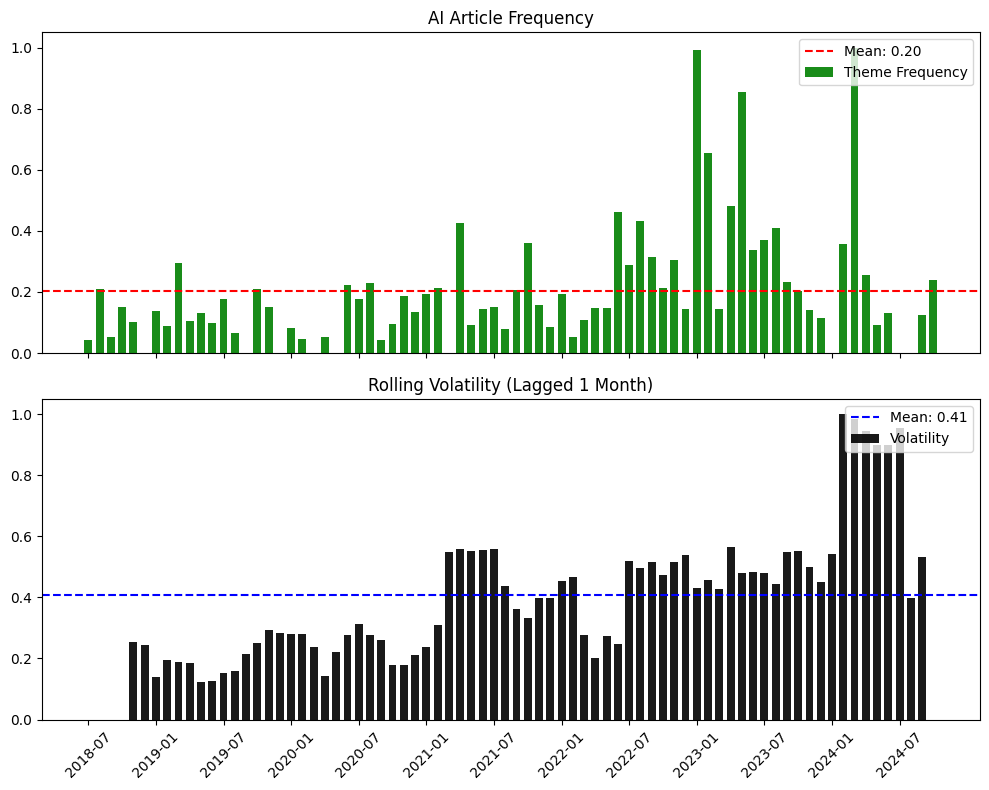


Metrics for Theme: Cybersecurity


Metric     Value
0  Mean Theme Freq  0.160422
1  Mean Volatility  0.511156
2         Train R²  0.025470
3          Test R² -0.255501

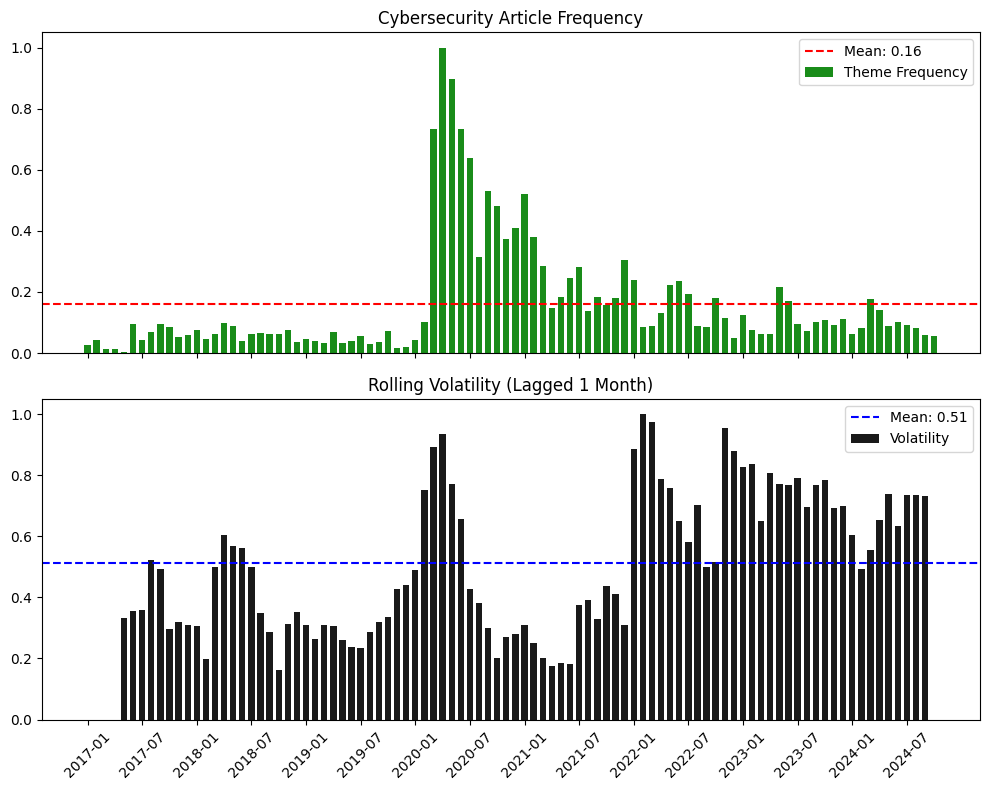


Metrics for Theme: Social Media


Metric     Value
0  Mean Theme Freq  0.247596
1  Mean Volatility  0.354917
2         Train R²  0.167298
3          Test R²  0.073959

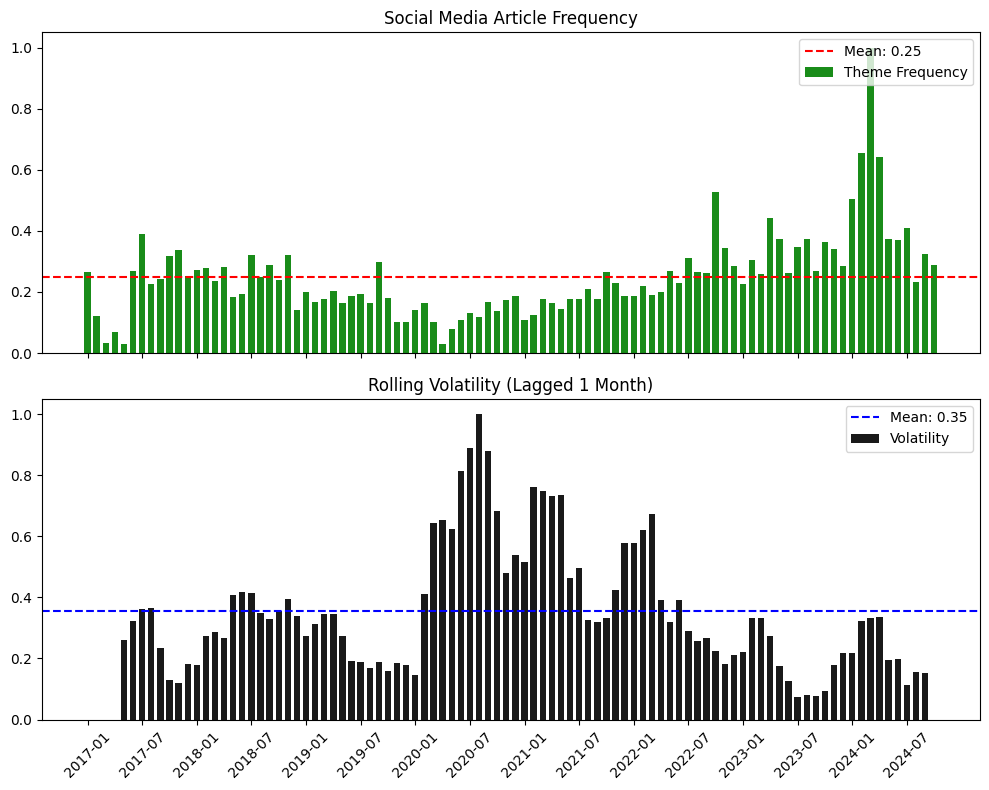


Metrics for Theme: EV


Metric     Value
0  Mean Theme Freq  0.341914
1  Mean Volatility  0.508315
2         Train R²  0.050440
3          Test R² -0.116594

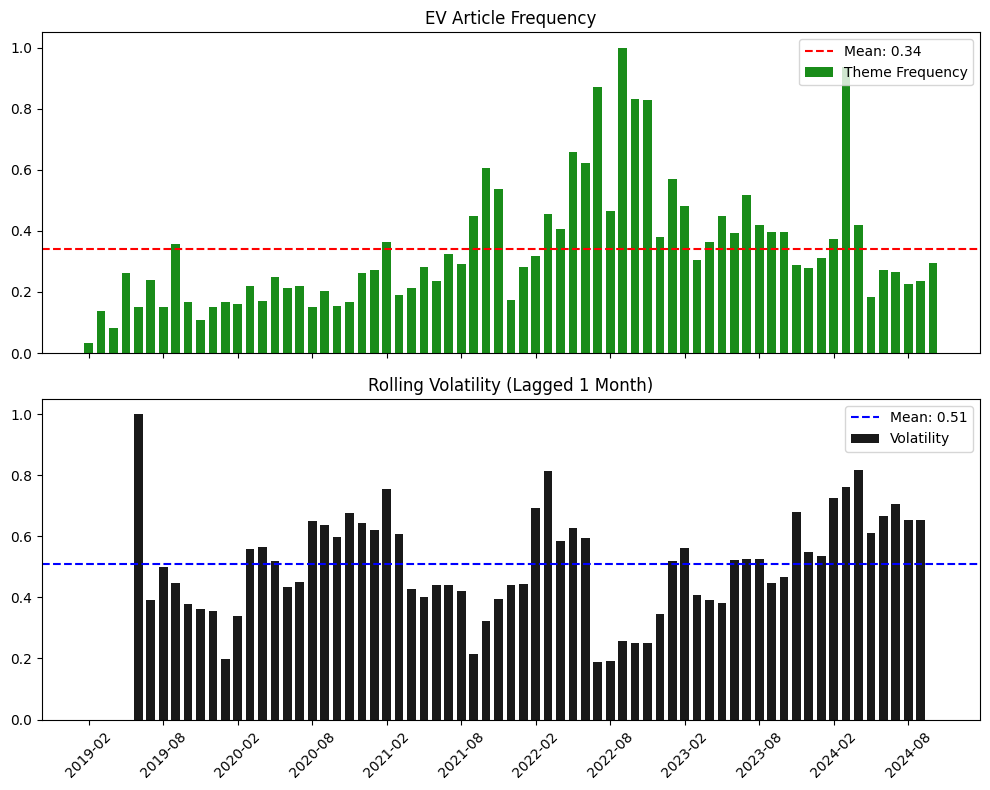


Metrics for Theme: Transistors


Metric     Value
0  Mean Theme Freq  0.257060
1  Mean Volatility  0.290575
2         Train R²  0.340348
3          Test R²  0.537200

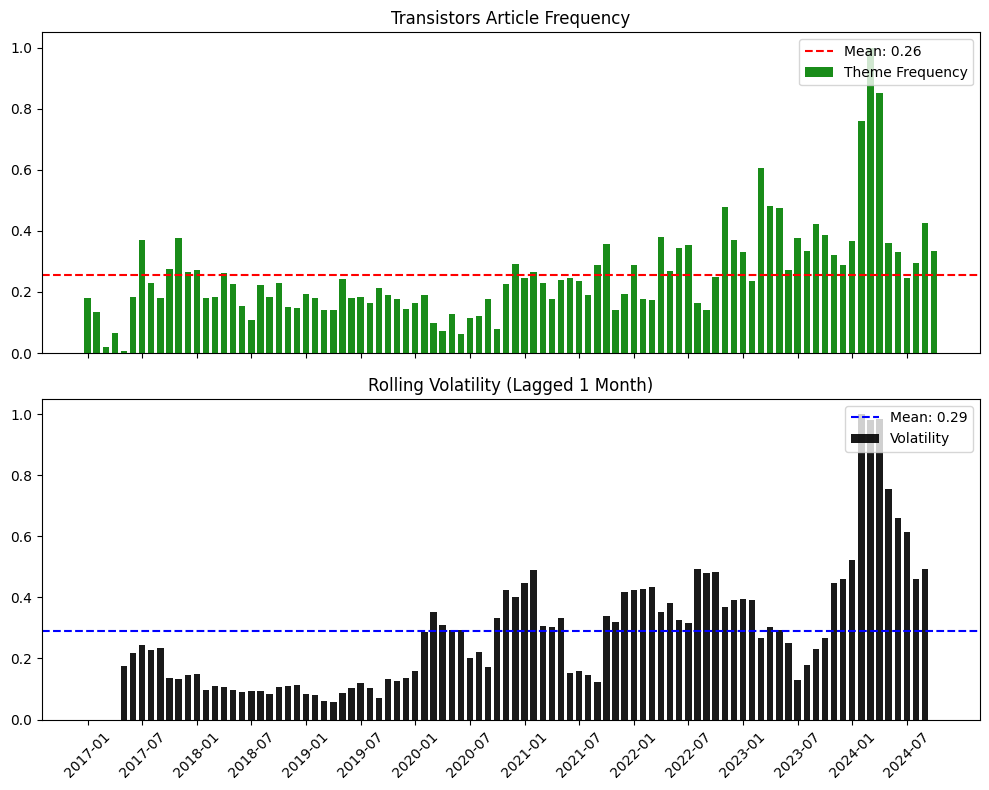


Metrics for Theme: Cloud Computing


Metric     Value
0  Mean Theme Freq  0.314785
1  Mean Volatility  0.551792
2         Train R²  0.016556
3          Test R² -0.372167

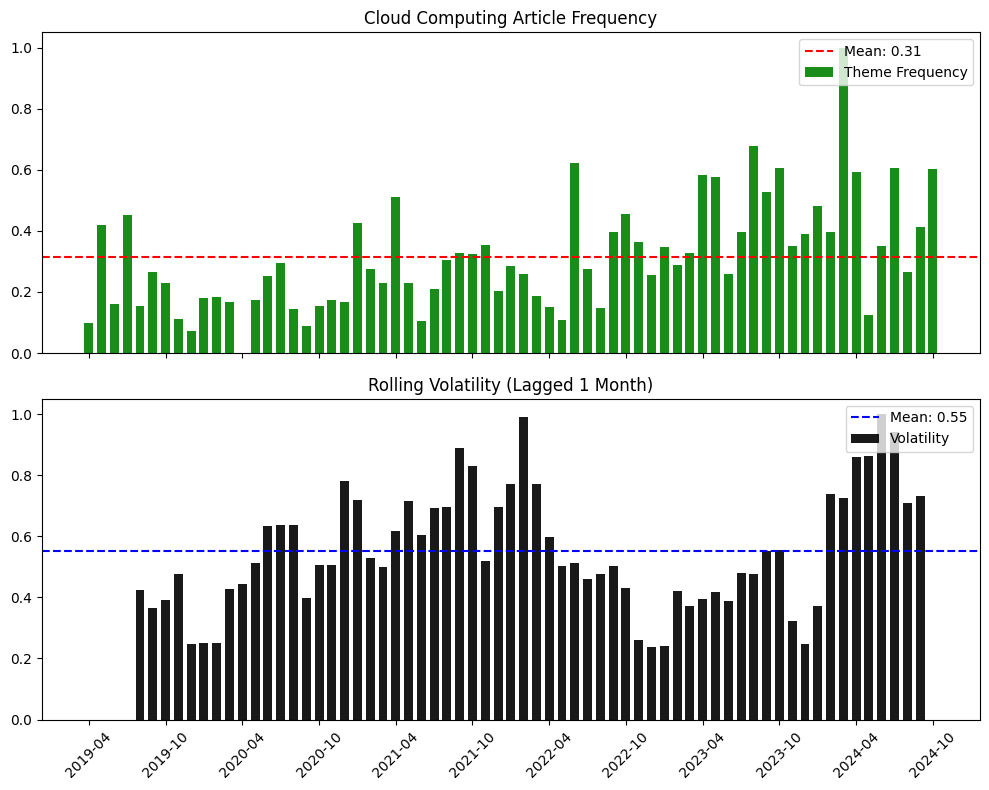


Metrics for Theme: Streaming


Metric     Value
0  Mean Theme Freq  0.460578
1  Mean Volatility  0.512167
2         Train R²  0.006052
3          Test R²  0.086435

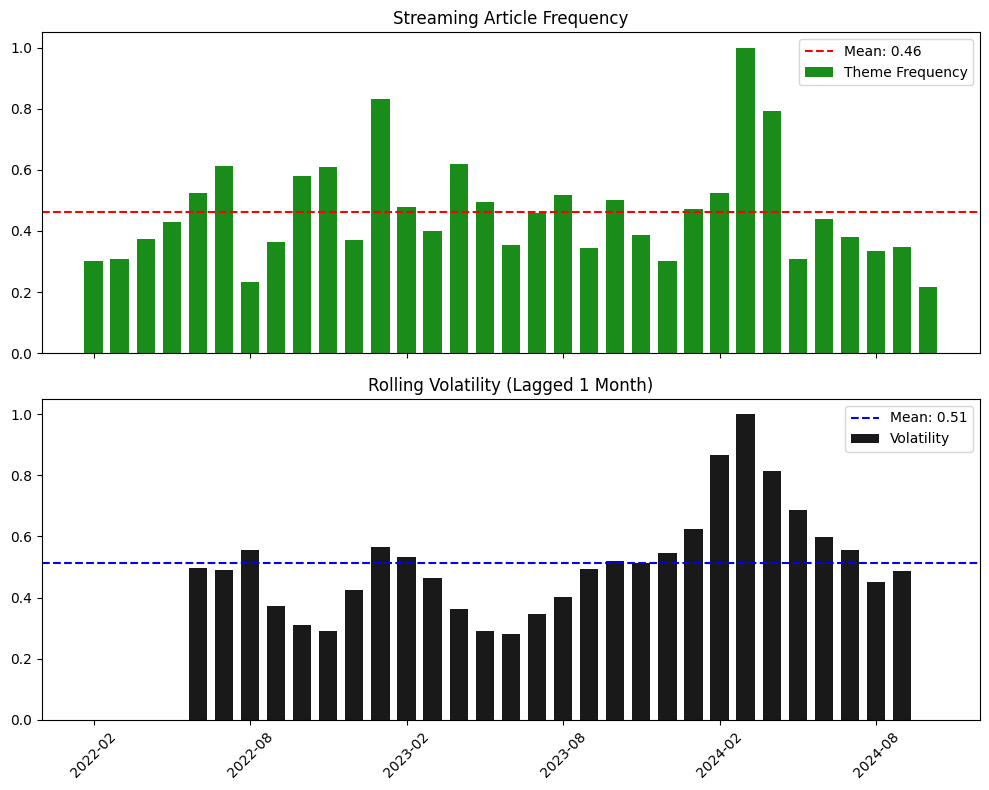


Metrics for Theme: VR


Metric     Value
0  Mean Theme Freq  0.387706
1  Mean Volatility  0.684916
2         Train R²  0.008985
3          Test R² -1.324460

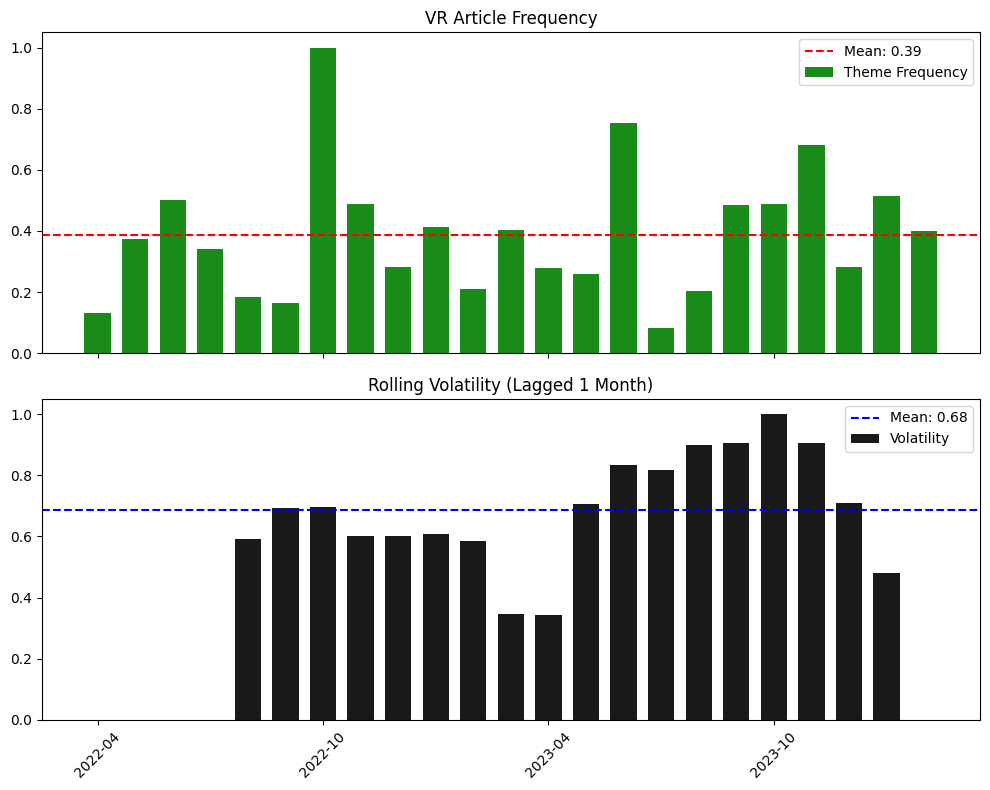

In [30]:
for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue  # Skip specific themes

    # Data preparation
    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volatility_df = pd.merge(price_df, results_df, on='date', how='inner')
    volatility_df.set_index('date', inplace=True)
    weekly_vol_df = volatility_df.resample('M').sum()

    # Normalize values
    volatility = weekly_vol_df['close'].rolling(6).std().shift(-1) / weekly_vol_df['close'].rolling(6).std().max()
    theme_freq = weekly_vol_df['theme_freq'] / weekly_vol_df['theme_freq'].max()

    # Remove NaN values for regression
    x_data = theme_freq.values
    y_data = volatility.values
    mask = ~np.isnan(x_data) & ~np.isnan(y_data)
    x_data_clean = x_data[mask].reshape(-1, 1)
    y_data_clean = y_data[mask]

    # Train-test split and regression
    x_train, x_test, y_train, y_test = train_test_split(x_data_clean, y_data_clean, test_size=0.2, random_state=42)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    r2_train = regressor.score(x_train, y_train)
    r2_test = regressor.score(x_test, y_test)

    # Calculate metrics and create DataFrame
    metrics = {
        "Metric": ["Mean Theme Freq", "Mean Volatility", "Train R²", "Test R²"],
        "Value": [theme_freq.mean(), volatility.mean(), r2_train, r2_test]
    }
    metrics_df = pd.DataFrame(metrics)

    # Display metrics as a table
    print(f"\nMetrics for Theme: {t}")
    display(metrics_df)

    # Plotting
    x_positions = np.arange(len(weekly_vol_df.index))
    bar_width = 0.7

    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Top subplot: Theme Frequency
    axs[0].bar(x_positions, theme_freq, width=bar_width, color='green', alpha=0.9, label='Theme Frequency')
    axs[0].axhline(y=theme_freq.mean(), color='red', linestyle='--', label=f'Mean: {theme_freq.mean():.2f}')
    axs[0].set_title(f"{t} Article Frequency")
    axs[0].legend(loc='upper right')
    
    # Bottom subplot: Rolling Volatility
    axs[1].bar(x_positions, volatility, width=bar_width, color='black', alpha=0.9, label='Volatility')
    axs[1].axhline(y=volatility.mean(), color='blue', linestyle='--', label=f'Mean: {volatility.mean():.2f}')
    axs[1].set_title("Rolling Volatility (Lagged 1 Month)")
    axs[1].legend(loc='upper right')

    # Add x-axis ticks and labels
    axs[1].set_xticks(x_positions[::6])
    axs[1].set_xticklabels(weekly_vol_df.index.strftime('%Y-%m')[::6], rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

### Volume Analysis


Metrics for Theme: AI


Metric     Value
0  Mean Theme Freq  0.151316
1      Mean Volume  0.063971
2         Train R²  0.162274
3          Test R² -0.416108

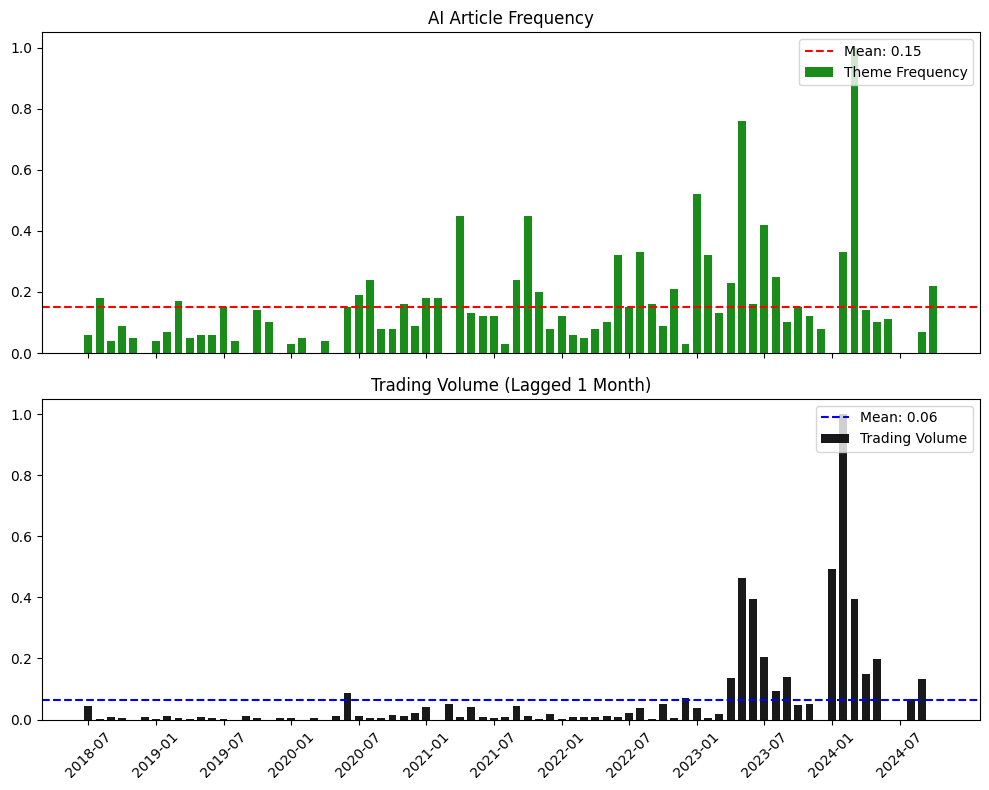


Metrics for Theme: Cybersecurity


Metric     Value
0  Mean Theme Freq  0.175200
1      Mean Volume  0.292894
2         Train R²  0.224847
3          Test R² -0.061511

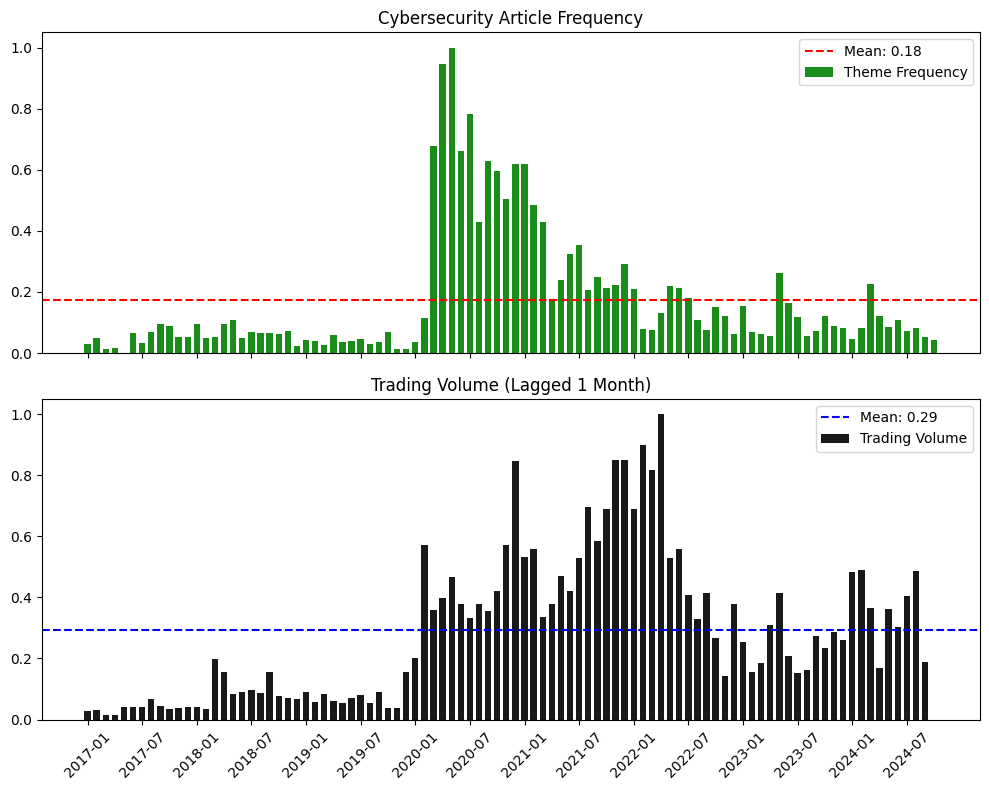


Metrics for Theme: Social Media


Metric     Value
0  Mean Theme Freq  0.248616
1      Mean Volume  0.217928
2         Train R²  0.019983
3          Test R² -0.034847

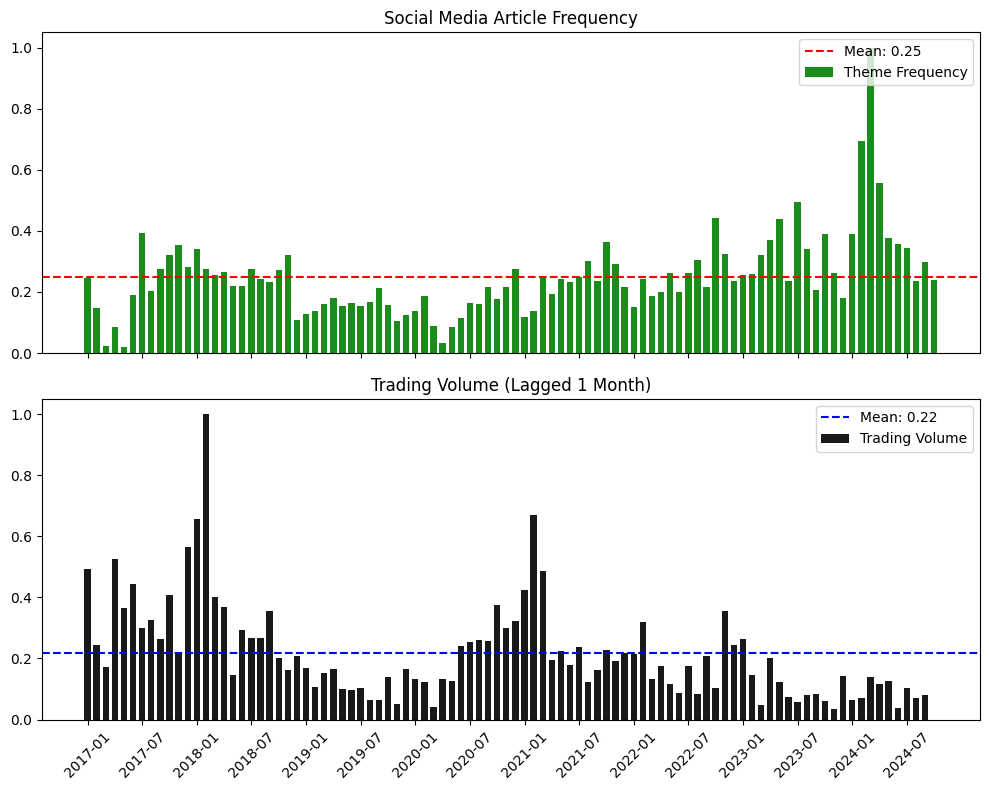


Metrics for Theme: EV


Metric     Value
0  Mean Theme Freq  0.363201
1      Mean Volume  0.160781
2         Train R²  0.019955
3          Test R² -0.138906

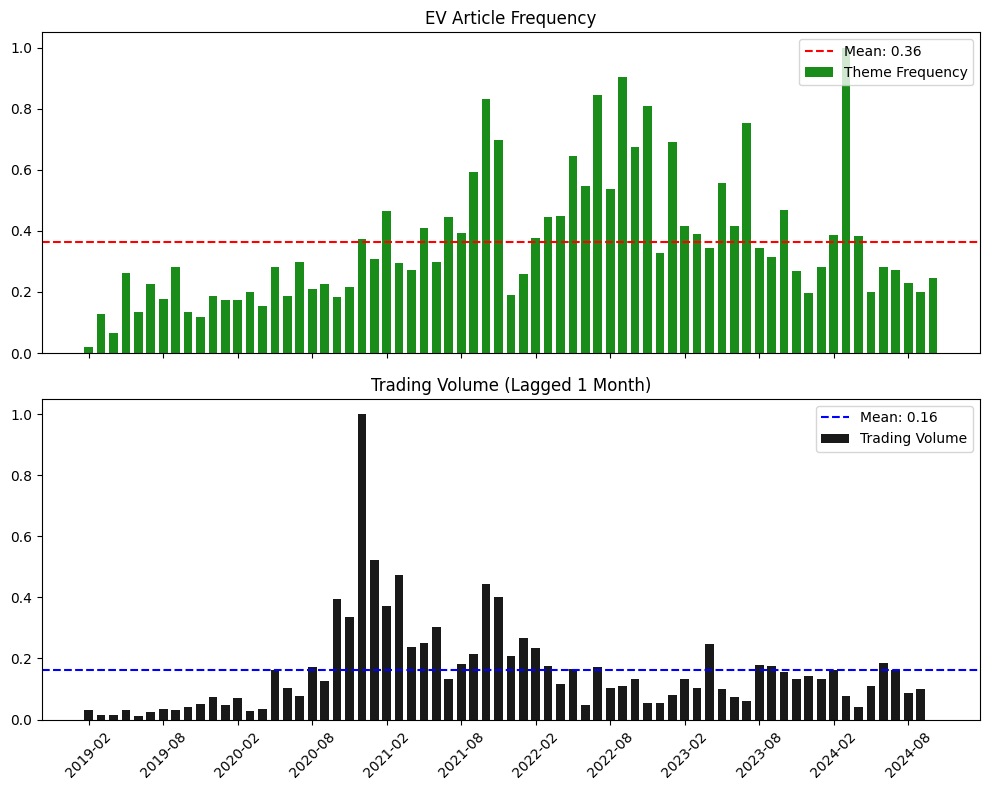


Metrics for Theme: Transistors


Metric     Value
0  Mean Theme Freq  0.257986
1      Mean Volume  0.365913
2         Train R²  0.143316
3          Test R²  0.031469

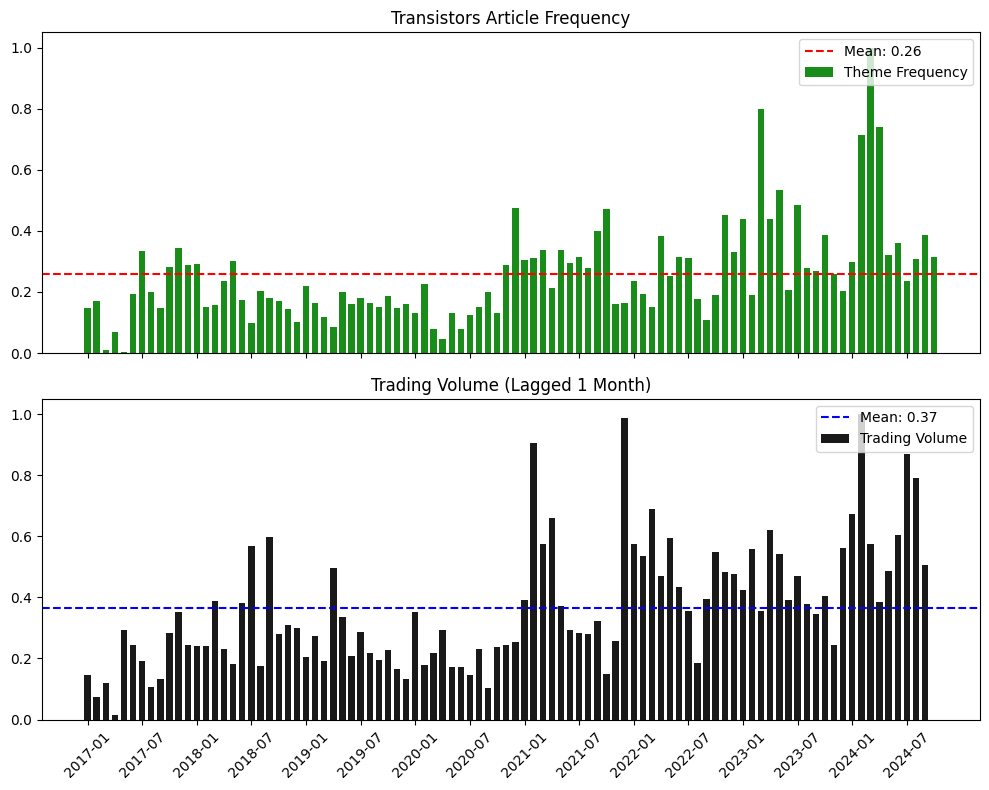


Metrics for Theme: Cloud Computing


Metric     Value
0  Mean Theme Freq  0.288518
1      Mean Volume  0.281266
2         Train R²  0.015479
3          Test R² -0.051875

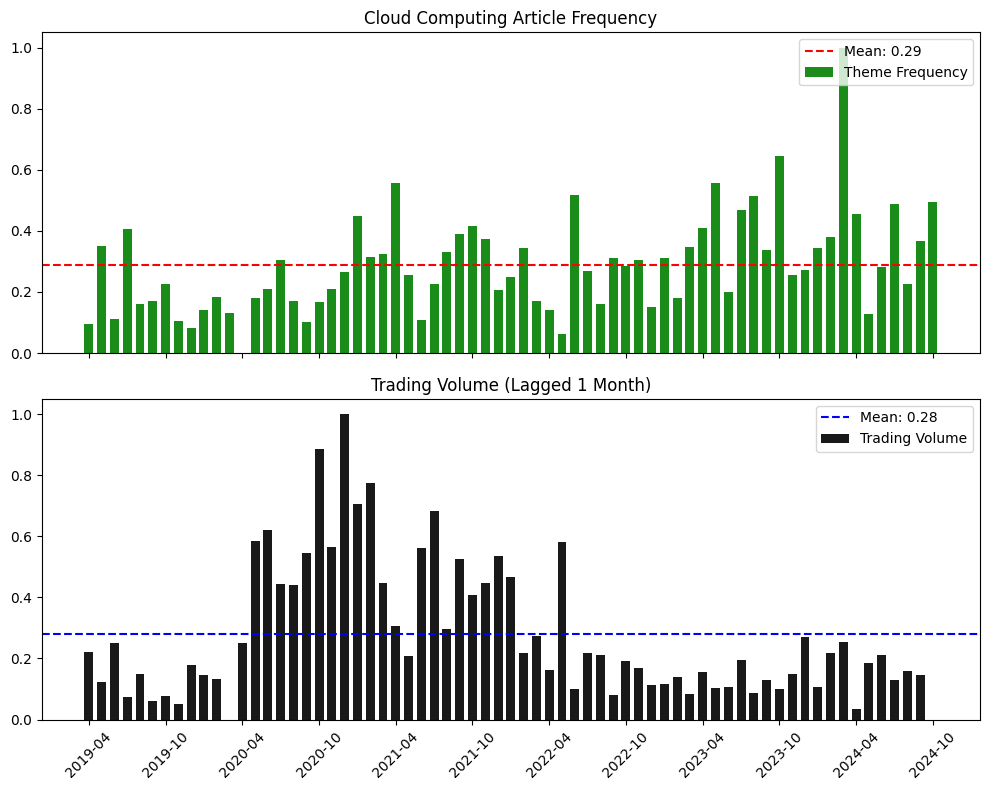


Metrics for Theme: Streaming


Metric     Value
0  Mean Theme Freq  0.453400
1      Mean Volume  0.111991
2         Train R²  0.035924
3          Test R²  0.175597

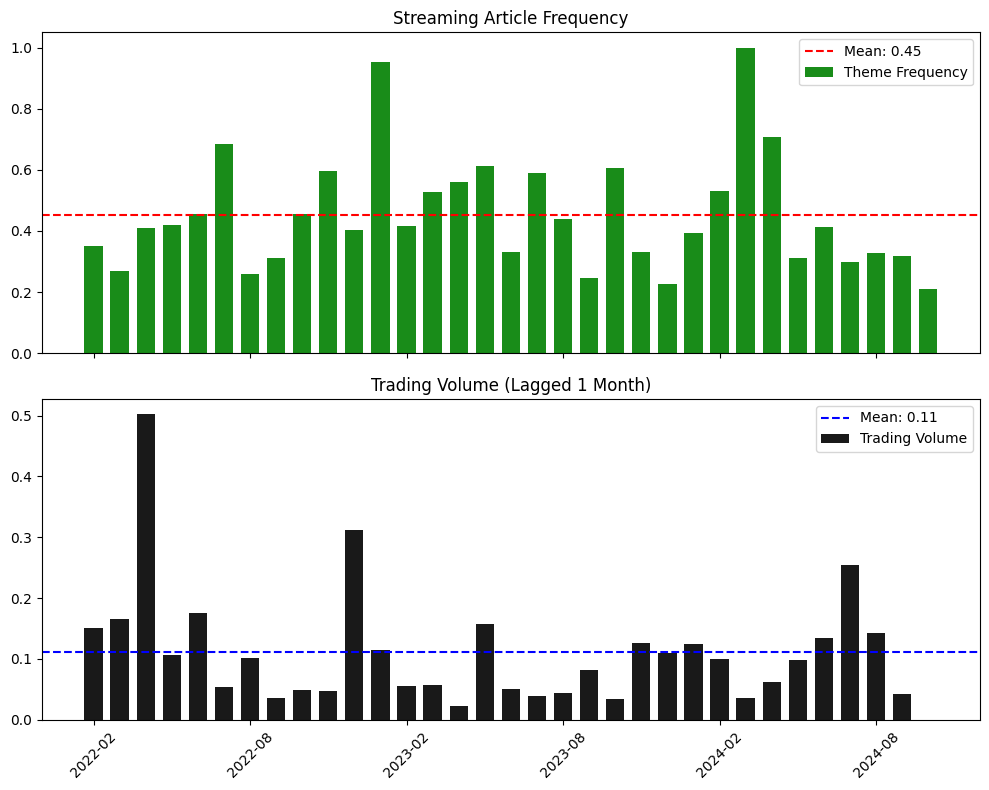


Metrics for Theme: VR


Metric     Value
0  Mean Theme Freq  0.446019
1      Mean Volume  0.184837
2         Train R²  0.081066
3          Test R² -0.274764

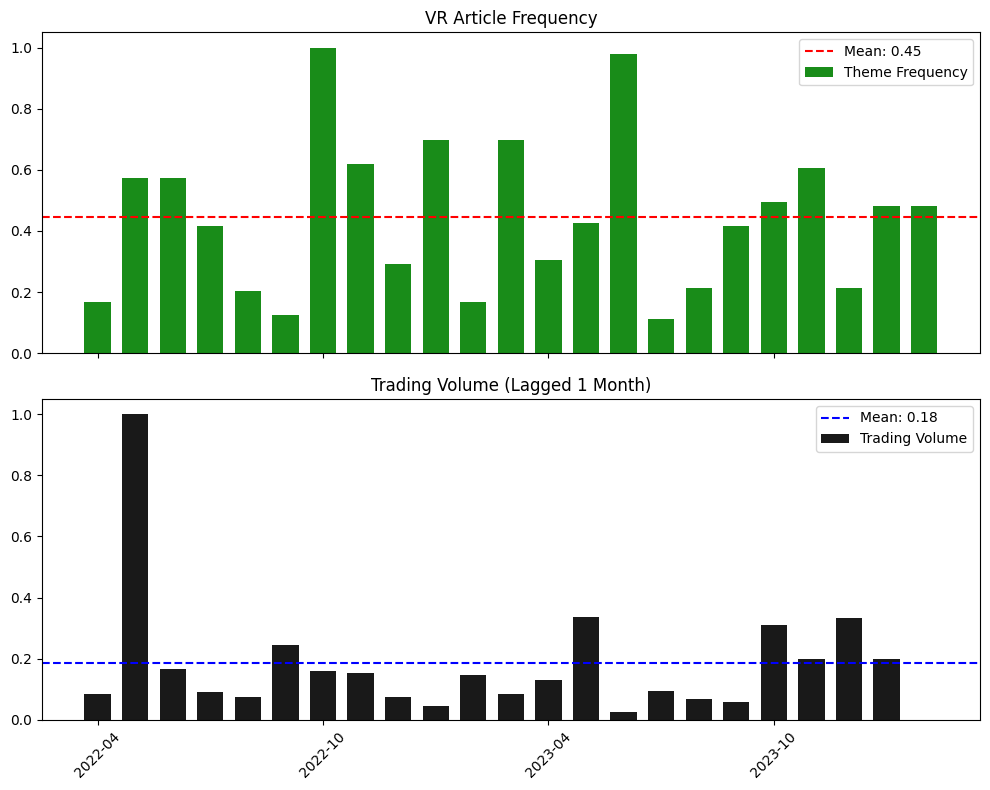

In [31]:
for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue


    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    weekly_vol_df = volume_df.resample('M').sum()


    volume = weekly_vol_df['volume'].shift(-1) / weekly_vol_df['volume'].max()
    theme_freq = weekly_vol_df['positive'] / weekly_vol_df['positive'].max()


    x_data = theme_freq.values
    y_data = volume.values
    mask = ~np.isnan(x_data) & ~np.isnan(y_data)
    x_data_clean = x_data[mask].reshape(-1, 1)
    y_data_clean = y_data[mask]


    x_train, x_test, y_train, y_test = train_test_split(x_data_clean, y_data_clean, test_size=0.2, random_state=42)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    r2_train = regressor.score(x_train, y_train)
    r2_test = regressor.score(x_test, y_test)


    metrics = {
        "Metric": ["Mean Theme Freq", "Mean Volume", "Train R²", "Test R²"],
        "Value": [theme_freq.mean(), volume.mean(), r2_train, r2_test]
    }
    metrics_df = pd.DataFrame(metrics)


    print(f"\nMetrics for Theme: {t}")
    display(metrics_df)


    x_positions = np.arange(len(weekly_vol_df.index))
    bar_width = 0.7

    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    

    axs[0].bar(x_positions, theme_freq, width=bar_width, color='green', alpha=0.9, label='Theme Frequency')
    axs[0].axhline(y=theme_freq.mean(), color='red', linestyle='--', label=f'Mean: {theme_freq.mean():.2f}')
    axs[0].set_title(f"{t} Article Frequency")
    axs[0].legend(loc='upper right')
    

    axs[1].bar(x_positions, volume, width=bar_width, color='black', alpha=0.9, label='Trading Volume')
    axs[1].axhline(y=volume.mean(), color='blue', linestyle='--', label=f'Mean: {volume.mean():.2f}')
    axs[1].set_title("Trading Volume (Lagged 1 Month)")
    axs[1].legend(loc='upper right')


    axs[1].set_xticks(x_positions[::6])
    axs[1].set_xticklabels(weekly_vol_df.index.strftime('%Y-%m')[::6], rotation=45)


    plt.tight_layout()
    plt.show()

### Volatility rolling correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


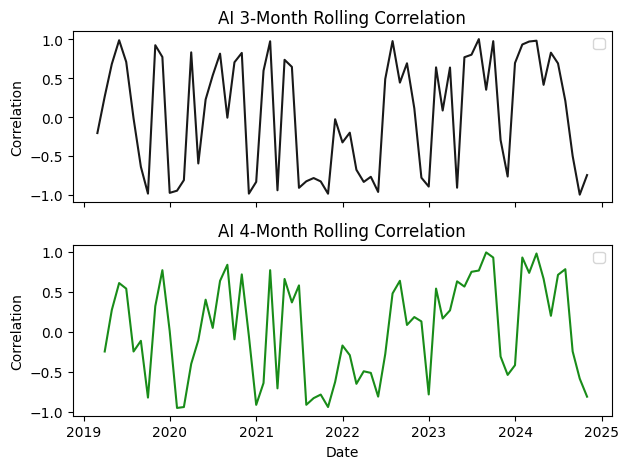

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


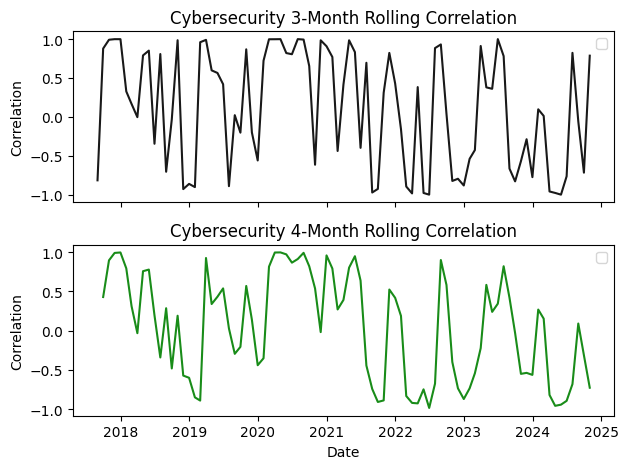

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


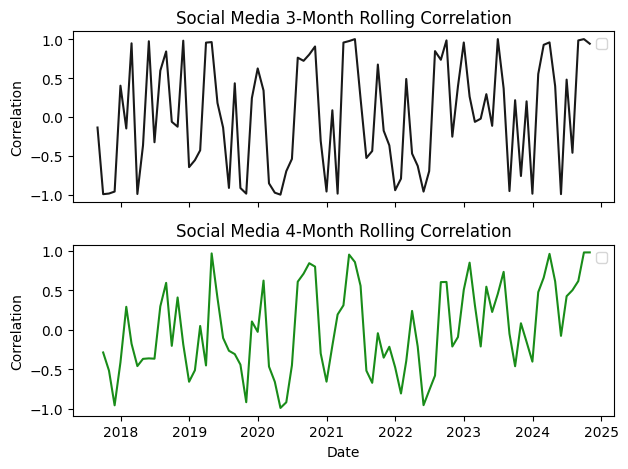

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


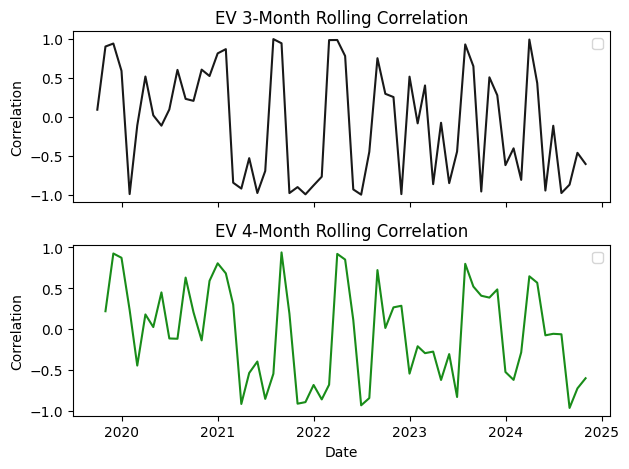

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


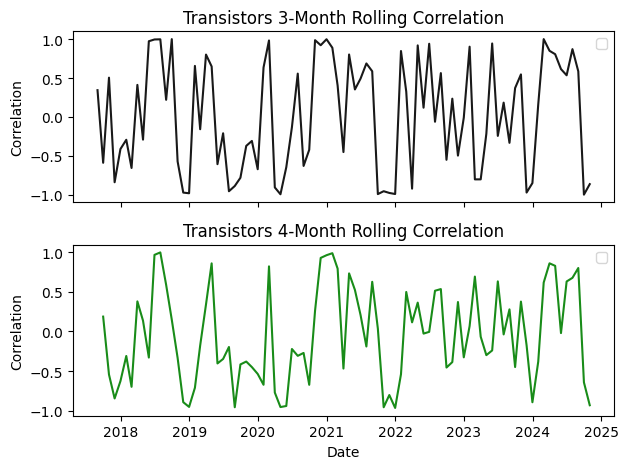

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


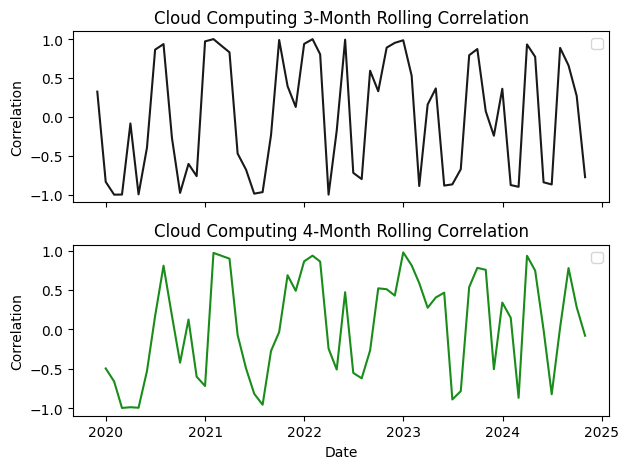

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


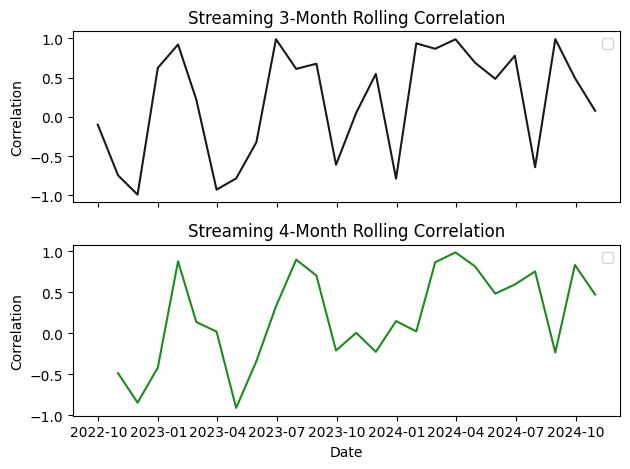

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


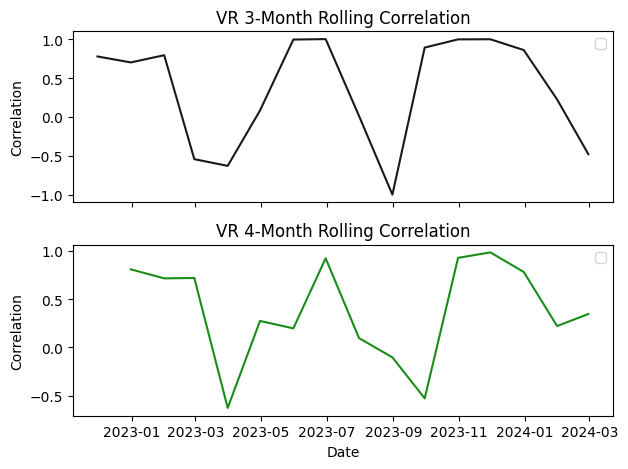

In [11]:
for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue

    # Get the data
    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volatility_df = pd.merge(price_df, results_df, on='date', how='inner')
    volatility_df.set_index('date', inplace=True)
    weekly_vol_df = volatility_df
    weekly_vol_df = volatility_df.resample('M').sum()
    weekly_vol_df.head()
    volatility = weekly_vol_df['close'].rolling(6).std()/weekly_vol_df['close'].rolling(6).std().max()
    theme_freq = weekly_vol_df['theme_freq']/weekly_vol_df['theme_freq'].max()

    # Calculate 3-month (12-week) and 4-month (16-week) rolling correlations
    rolling_corr_3m = weekly_vol_df['close'].rolling(6).std().rolling(window=3).corr(weekly_vol_df['theme_freq'])
    rolling_corr_4m = weekly_vol_df['close'].rolling(6).std().rolling(window=4).corr(weekly_vol_df['theme_freq'])

    # Plot the rolling correlations
    fig, axs = plt.subplots(2, 1, sharex=True)

    # Plot rolling correlation for 3-month window
    axs[0].plot(weekly_vol_df.index, rolling_corr_3m, color='black', alpha=0.9)
    axs[0].set_title(f"{t} 3-Month Rolling Correlation")
    axs[0].set_ylabel("Correlation")
    axs[0].legend()

    # Plot rolling correlation for 4-month window
    axs[1].plot(weekly_vol_df.index, rolling_corr_4m, color='green', alpha=0.9)
    axs[1].set_title(f"{t} 4-Month Rolling Correlation")
    axs[1].set_xlabel("Date")
    axs[1].set_ylabel("Correlation")
    axs[1].legend()

    # Add x-axis labels for both subplots
    #axs[1].set_xticks(np.arange(0, len(weekly_vol_df.index), 6))  # Every 6th point
    #axs[1].set_xticklabels(weekly_vol_df.index.strftime('%Y-%m')[::6], rotation=45)

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()


### Volume rolling correlation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


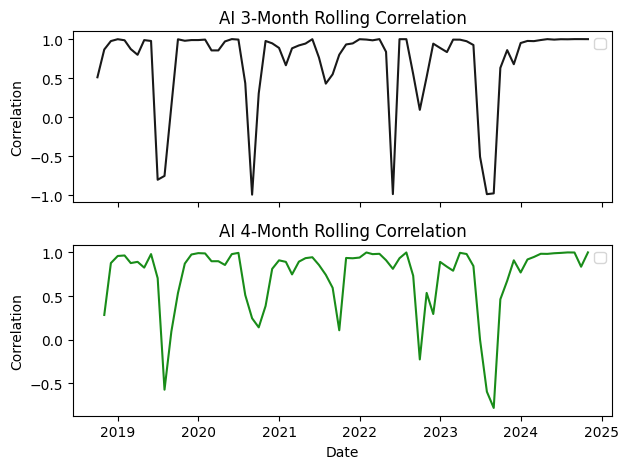

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


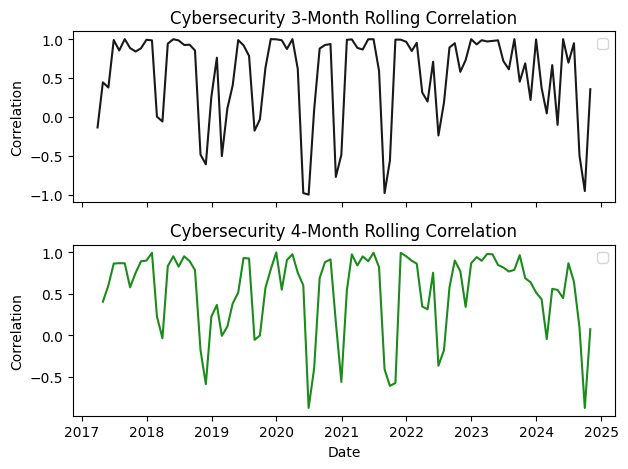

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


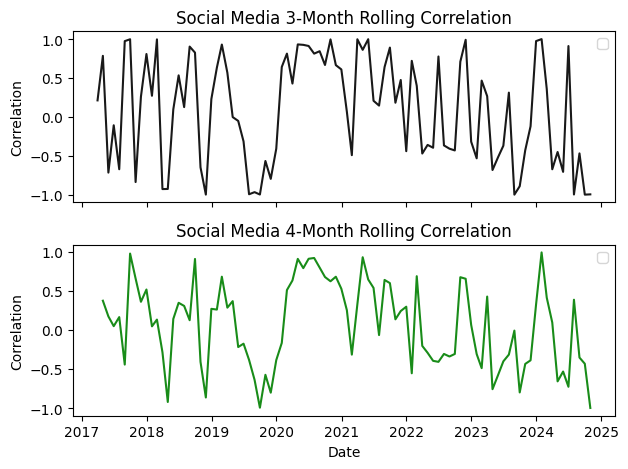

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


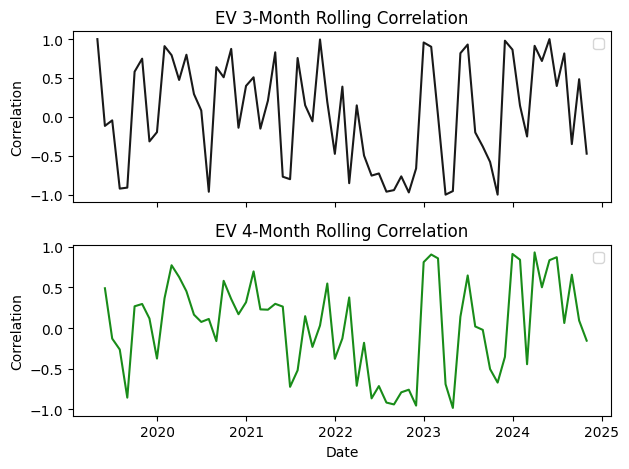

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


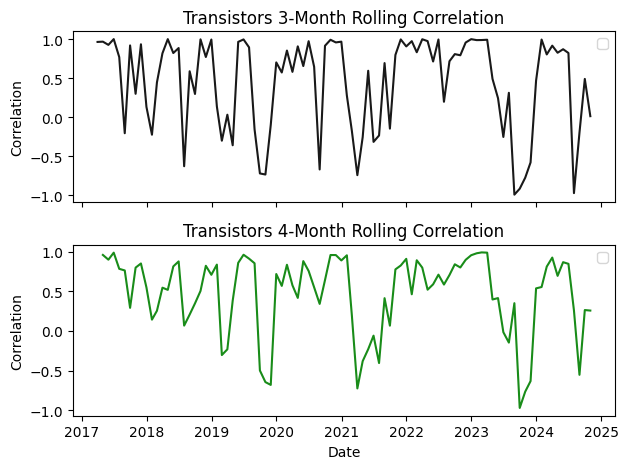

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


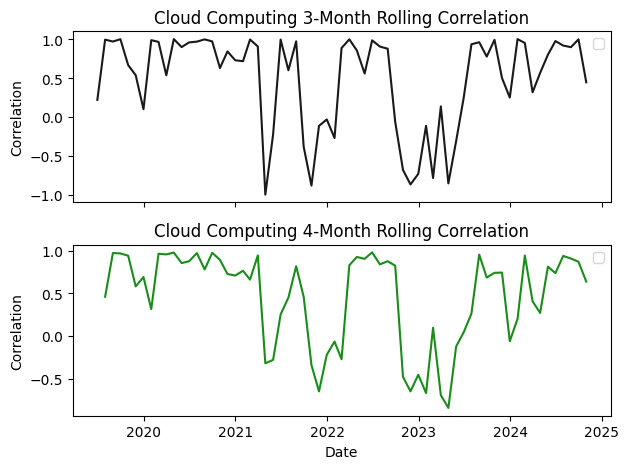

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


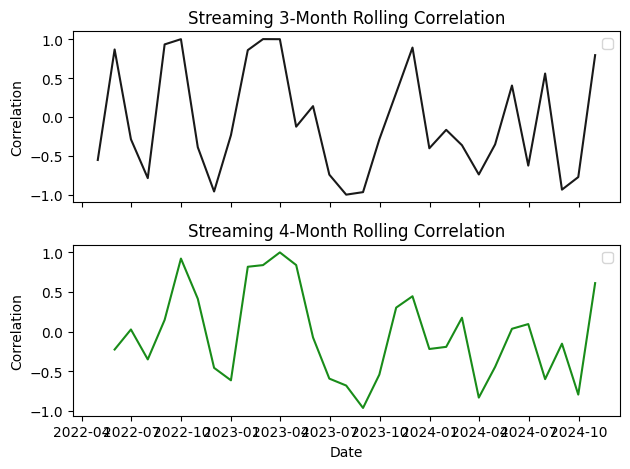

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


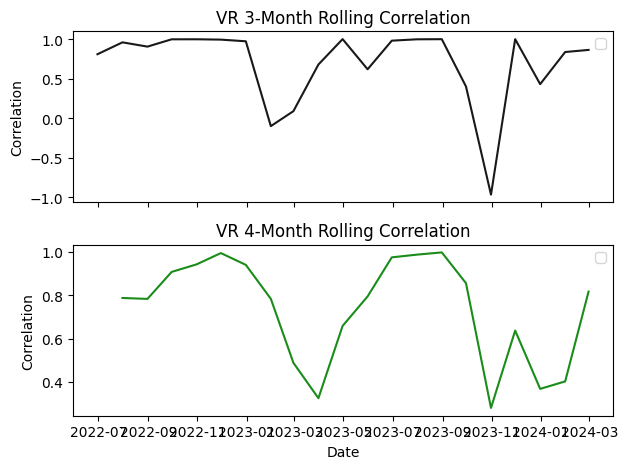

In [12]:
for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue

    # Get the data
    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)

    # Resample to monthly data
    weekly_vol_df = volume_df.resample('M').sum()

    # Normalize the data
    volume = weekly_vol_df['volume'] / weekly_vol_df['volume'].max()
    theme_freq = weekly_vol_df['theme_freq'] / weekly_vol_df['theme_freq'].max()

    # Calculate 3-month (12-week) and 4-month (16-week) rolling correlations
    rolling_corr_3m = weekly_vol_df['volume'].rolling(window=3).corr(weekly_vol_df['theme_freq'])
    rolling_corr_4m = weekly_vol_df['volume'].rolling(window=4).corr(weekly_vol_df['theme_freq'])

    # Plot the rolling correlations
    fig, axs = plt.subplots(2, 1, sharex=True)

    # Plot rolling correlation for 3-month window
    axs[0].plot(weekly_vol_df.index, rolling_corr_3m, color='black', alpha=0.9)
    axs[0].set_title(f"{t} 3-Month Rolling Correlation")
    axs[0].set_ylabel("Correlation")
    axs[0].legend()

    # Plot rolling correlation for 4-month window
    axs[1].plot(weekly_vol_df.index, rolling_corr_4m, color='green', alpha=0.9)
    axs[1].set_title(f"{t} 4-Month Rolling Correlation")
    axs[1].set_xlabel("Date")
    axs[1].set_ylabel("Correlation")
    axs[1].legend()

    # Add x-axis labels for both subplots
    #axs[1].set_xticks(np.arange(0, len(weekly_vol_df.index), 6))  # Every 6th point
    #axs[1].set_xticklabels(weekly_vol_df.index.strftime('%Y-%m')[::6], rotation=45)

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()


### Return Analysis

AI


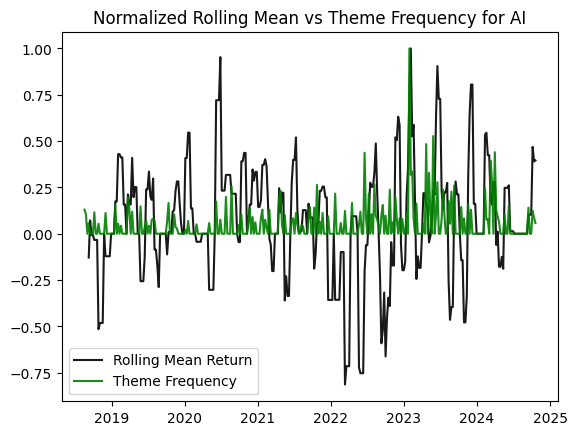

Cybersecurity


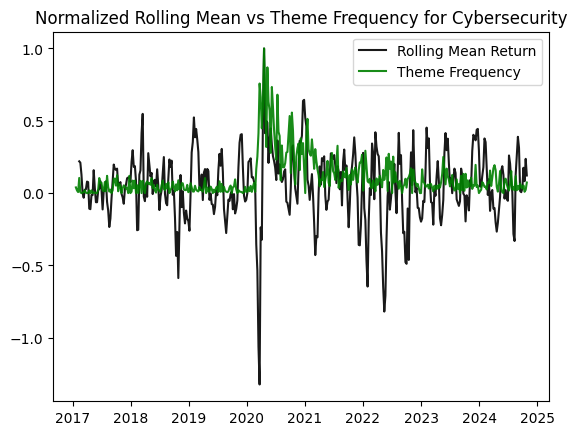

Social Media


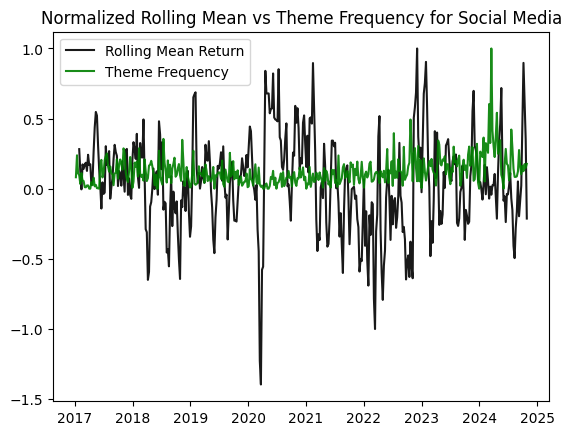

EV


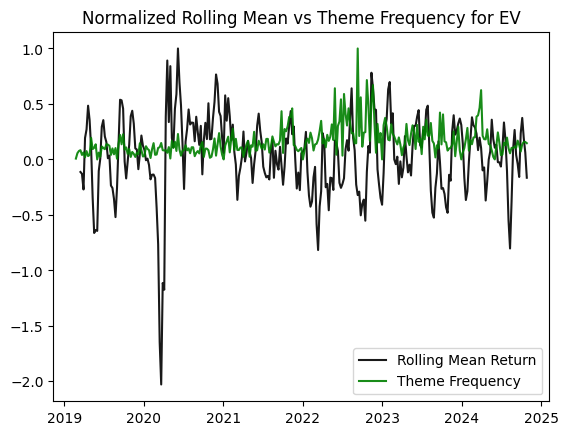

Transistors


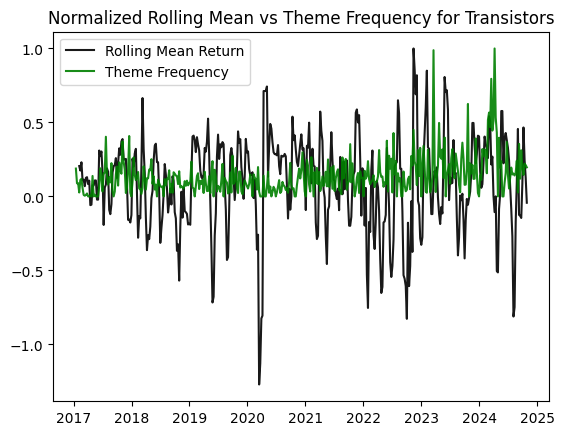

Cloud Computing


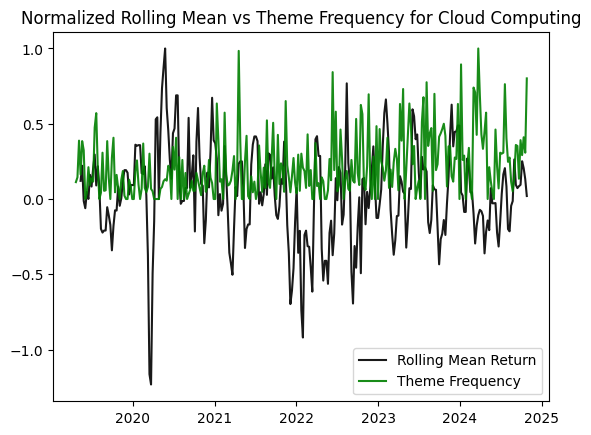

Streaming


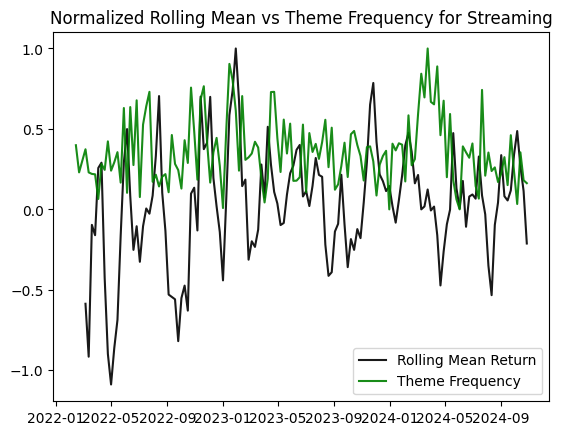

VR


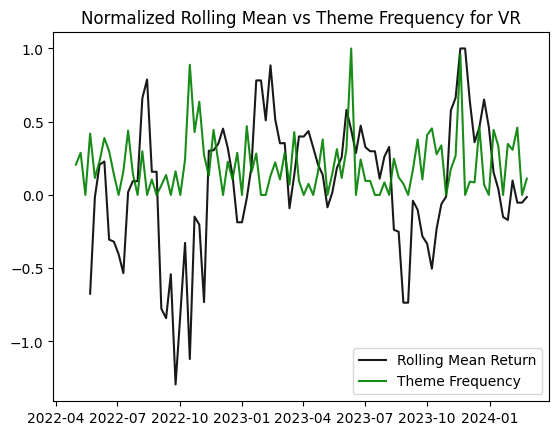

TNX
Market


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

for t in theme_dict.keys():
    print(t)
    if t == "TNX" or t == "Market":
        continue
    

    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    volume_df['daily_return'] = volume_df['close'].pct_change()
    volume_df = volume_df.dropna()
    weekly_vol_df = volume_df.resample('W').agg({
        'daily_return': 'sum', 
        'theme_freq': 'sum'    
    })
    
   
    weekly_vol_df['rolling_mean'] = weekly_vol_df['daily_return'].rolling(window=4).mean()
    rolling_vol_normalized = weekly_vol_df['rolling_mean'] / weekly_vol_df['rolling_mean'].max()
    theme_freq_normalized = weekly_vol_df['theme_freq'] / weekly_vol_df['theme_freq'].max()

    plt.plot(weekly_vol_df.index, rolling_vol_normalized, label='Rolling Mean Return', color='black', alpha=0.9)
    plt.plot(weekly_vol_df.index, theme_freq_normalized, label='Theme Frequency', color='green', alpha=0.9)
    plt.title(f"Normalized Rolling Mean vs Theme Frequency for {t}")
    plt.legend()
    plt.show()

AI


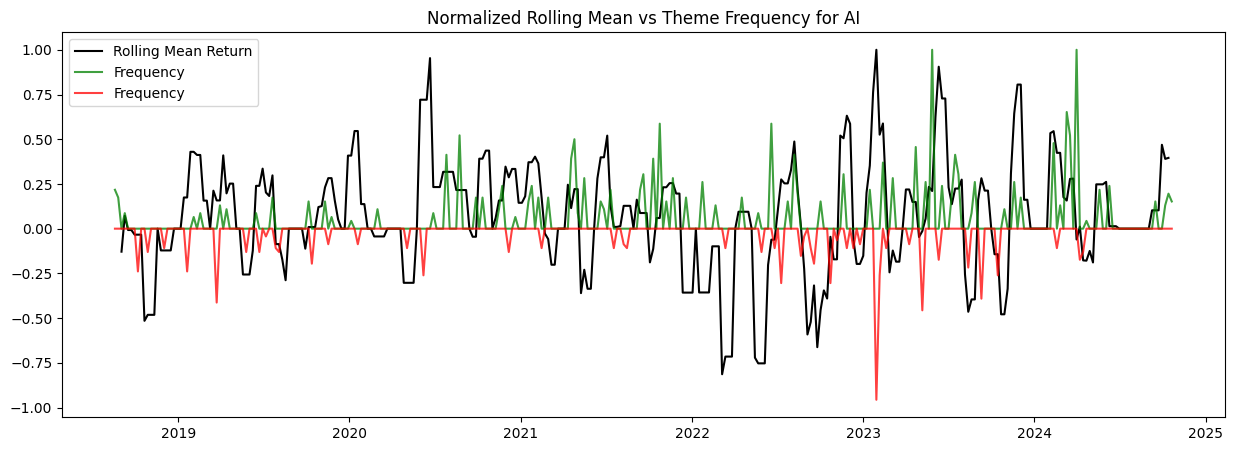

Cybersecurity


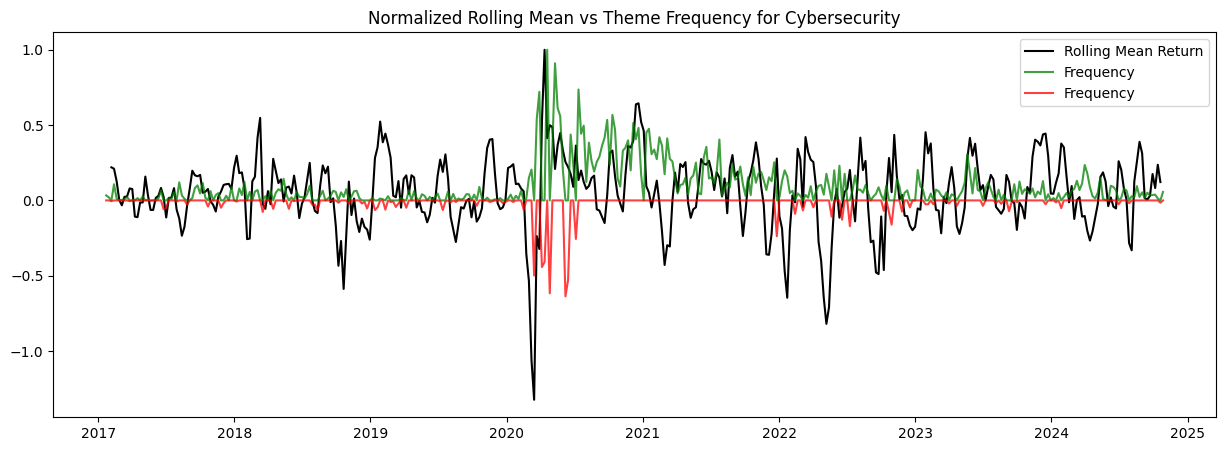

Social Media


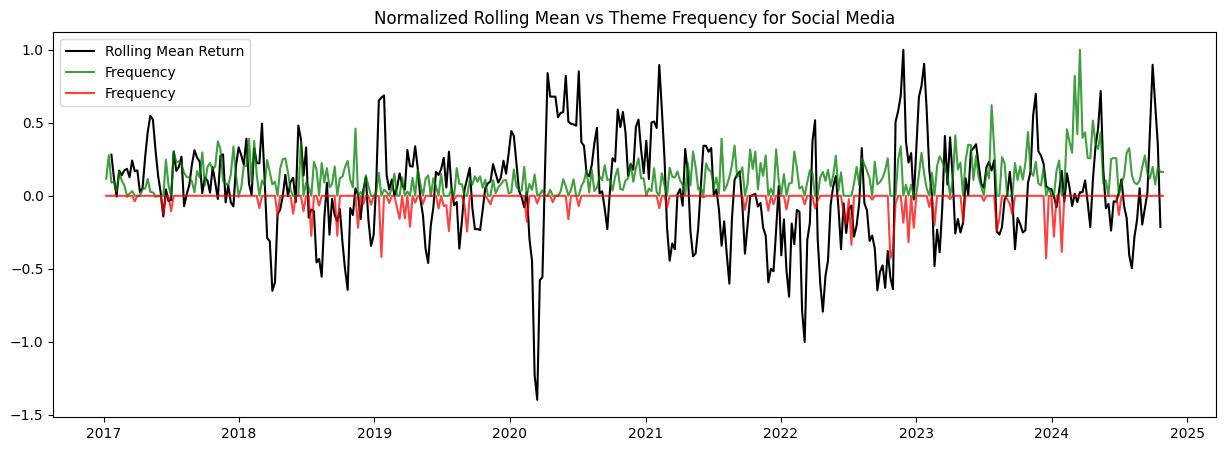

EV


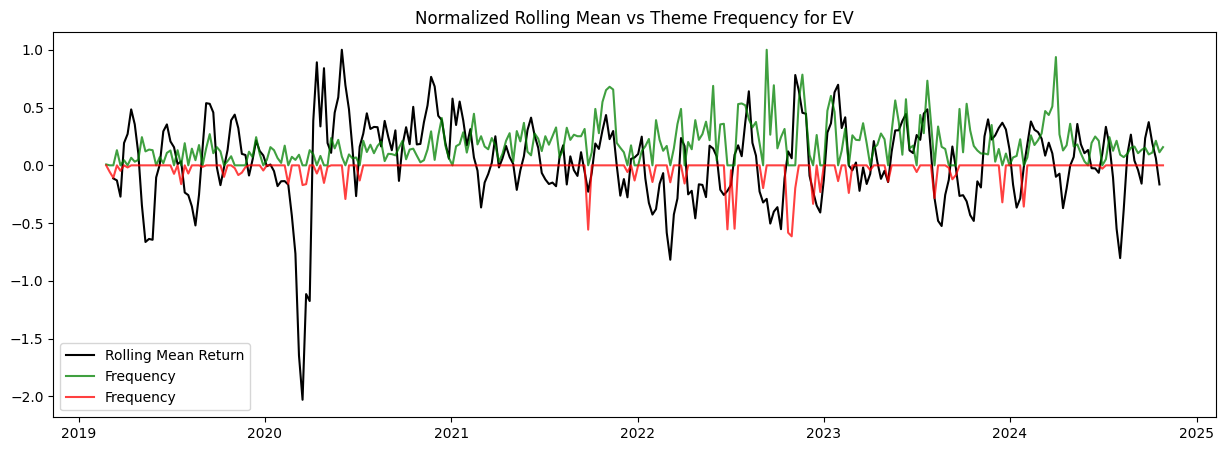

Transistors


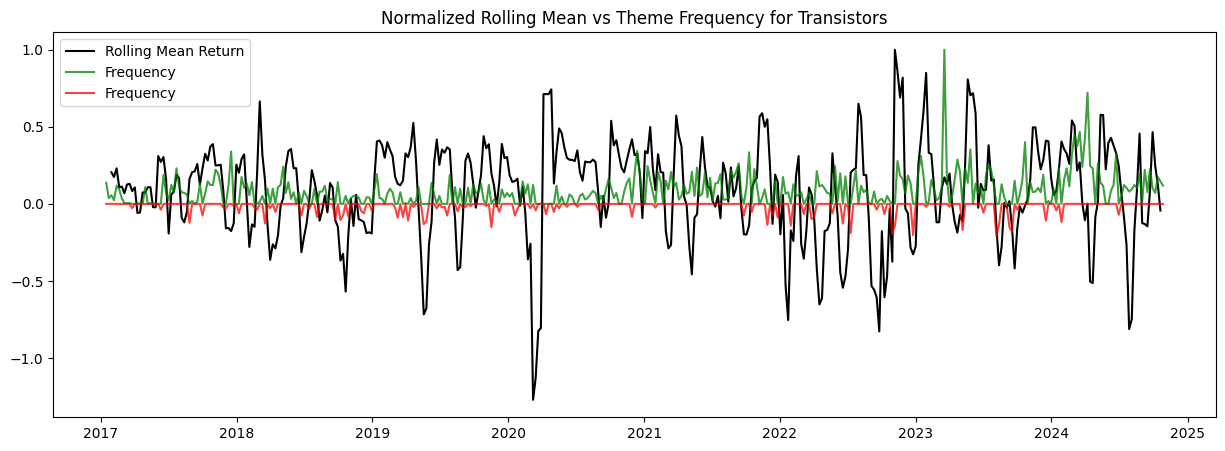

Cloud Computing


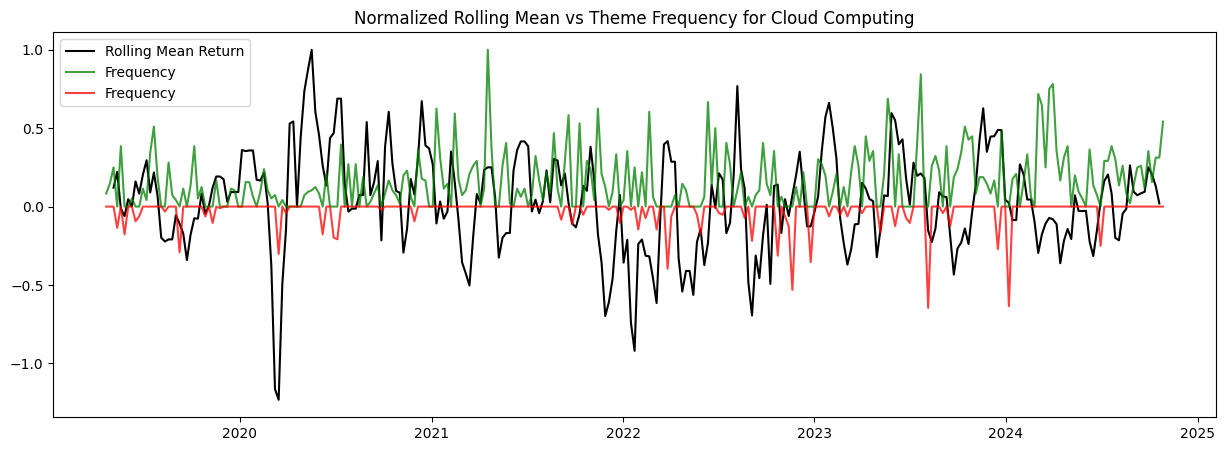

Streaming


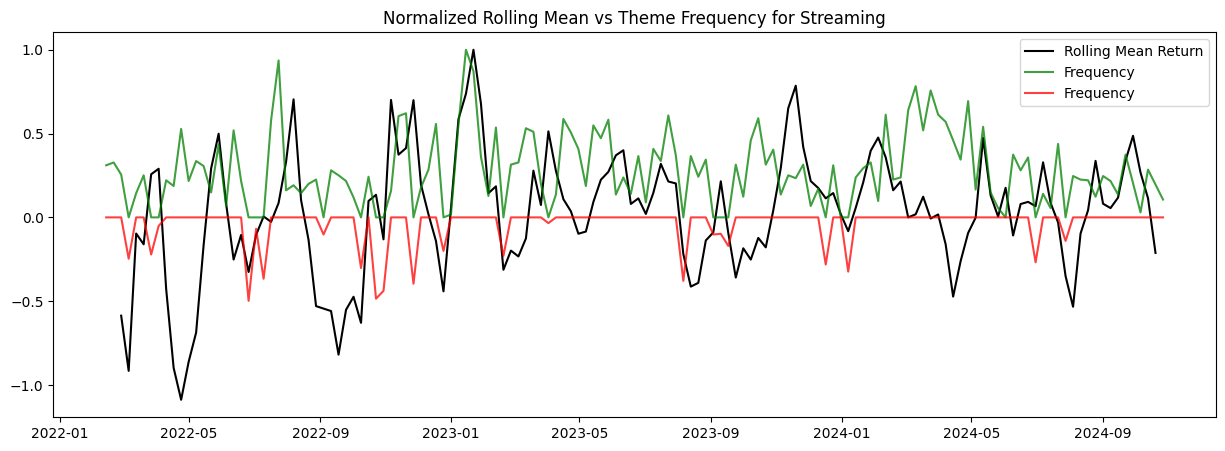

VR


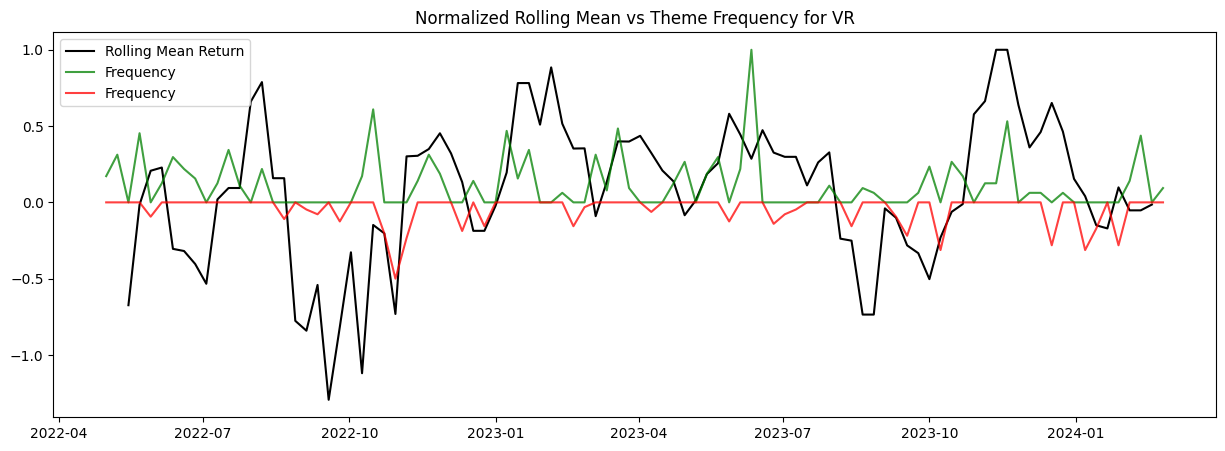

TNX
Market


In [14]:
for t in theme_dict.keys():
    print(t)
    if t == "TNX" or t == "Market":
        continue
    

    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    volume_df['daily_return'] = volume_df['close'].pct_change()
    volume_df = volume_df.dropna()
    weekly_vol_df = volume_df.resample('W').agg({
        'daily_return': 'sum', 
        'positive': 'sum',  
        'negative': 'sum'  
    })
    
   
    weekly_vol_df['rolling_mean'] = weekly_vol_df['daily_return'].rolling(4).mean()
    rolling_vol_normalized = weekly_vol_df['rolling_mean'] / weekly_vol_df['rolling_mean'].max()
    rolling_vol_normalized = rolling_vol_normalized.shift(-1)
    
    net_sent = pd.Series([x if x > y else -y for x, y in zip(weekly_vol_df['positive'], weekly_vol_df['negative'])])
    net_sent_normalized = net_sent/net_sent.max()
    
    net_sent_normalized_pos = net_sent_normalized.apply(lambda x: x if x > 0 else 0)
    net_sent_normalized_neg = net_sent_normalized.apply(lambda x: x if x <= 0 else 0)
    
    #positive_freq_normalized = weekly_vol_df['positive'] / weekly_vol_df['positive'].max()
    #neg_freq_normalized = weekly_vol_df['negative'] / weekly_vol_df['negative'].max()

    plt.figure(figsize = (15,5))
    plt.plot(weekly_vol_df.index, rolling_vol_normalized, label='Rolling Mean Return', color='black', alpha=1)
    plt.plot(weekly_vol_df.index, net_sent_normalized_pos, label='Frequency', color='green', alpha=0.75)
    plt.plot(weekly_vol_df.index, net_sent_normalized_neg, label='Frequency', color='red', alpha=0.75)
    plt.title(f"Normalized Rolling Mean vs Theme Frequency for {t}")
    plt.legend()
    plt.show()

### Trading Strategy - Theme Saturation Rotation Strategy

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


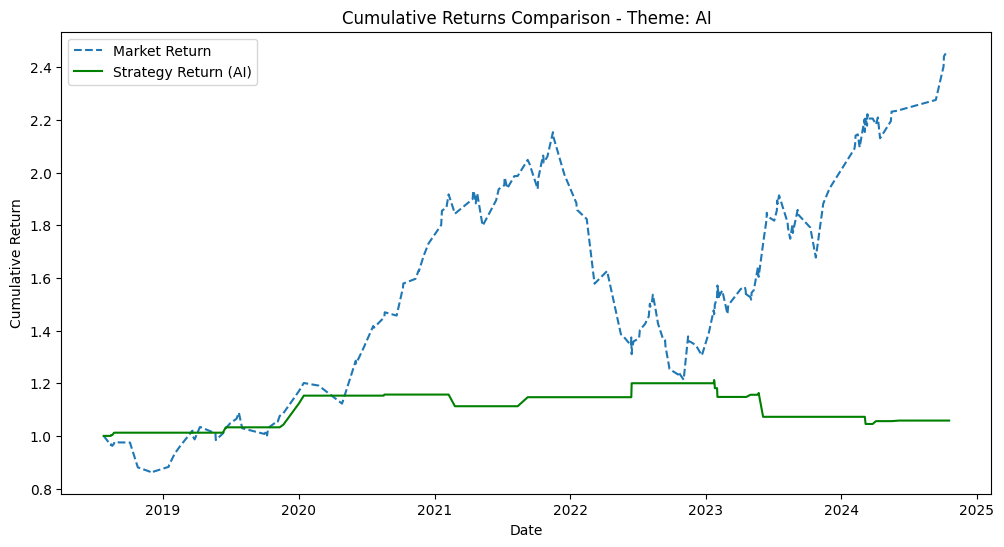

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


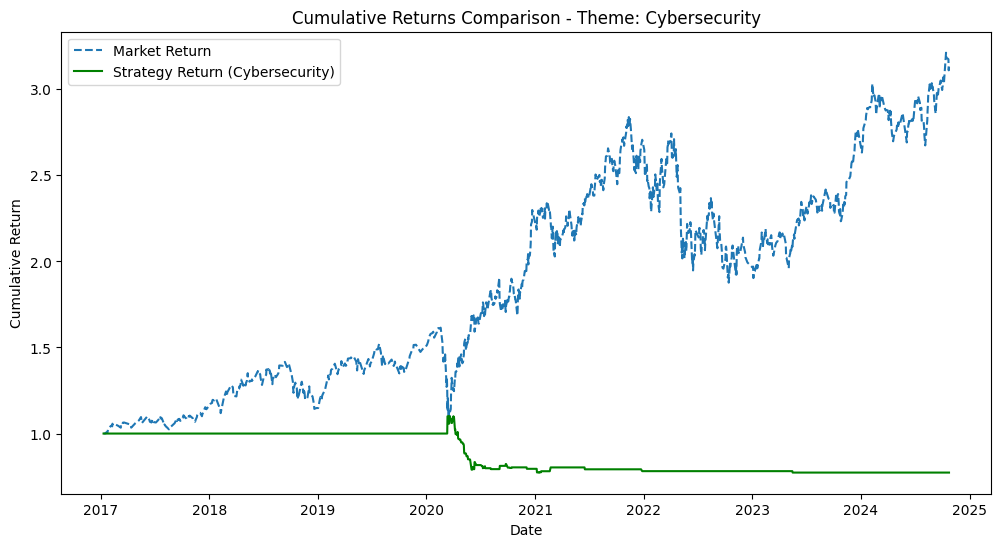

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


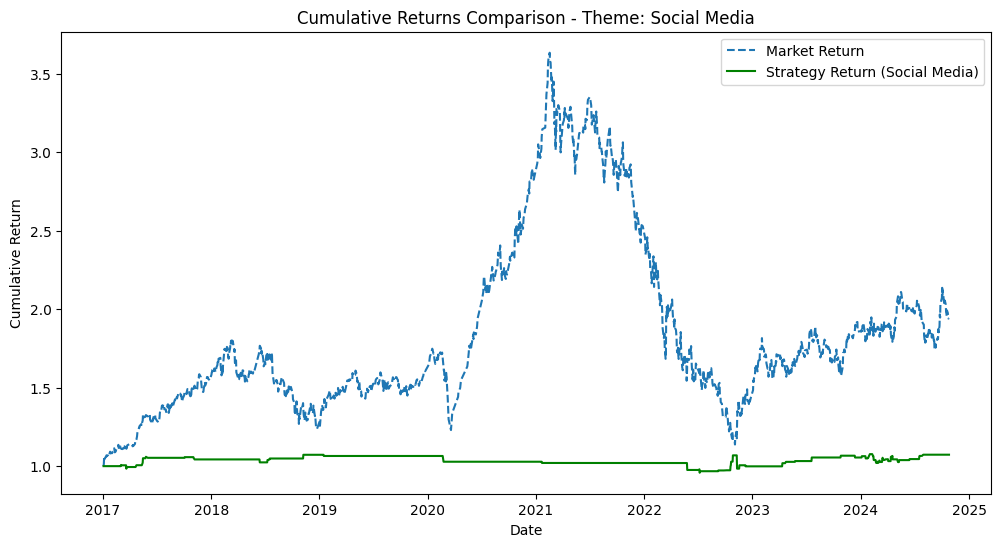

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


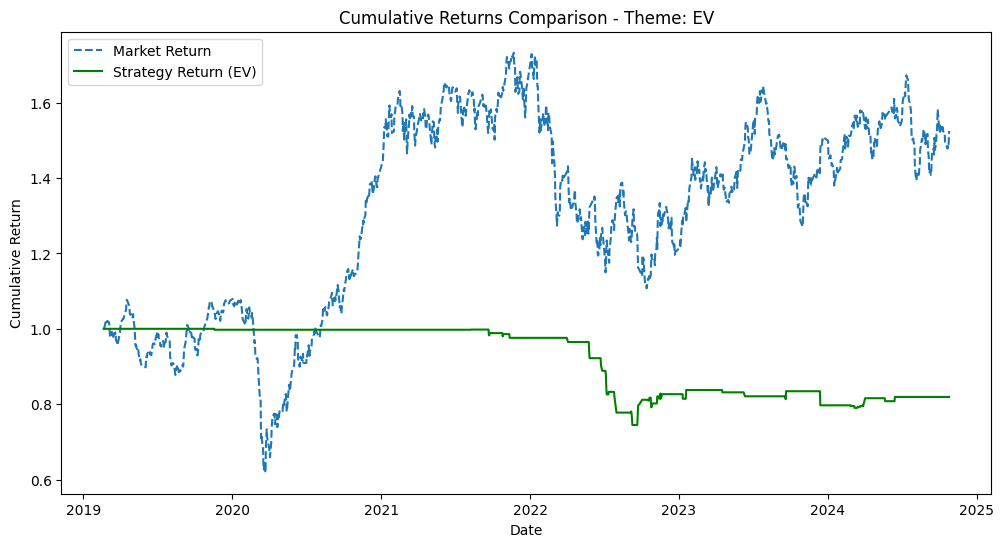

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


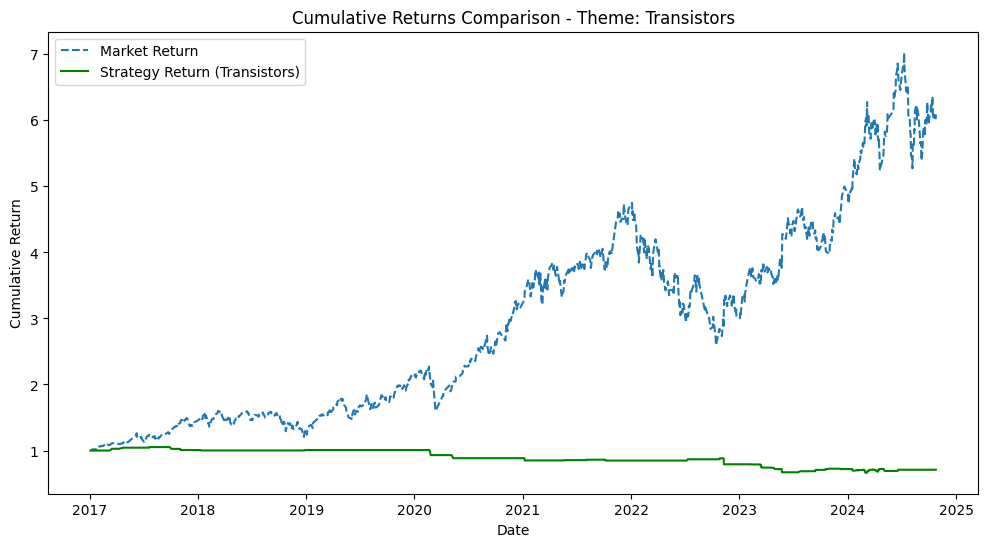

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


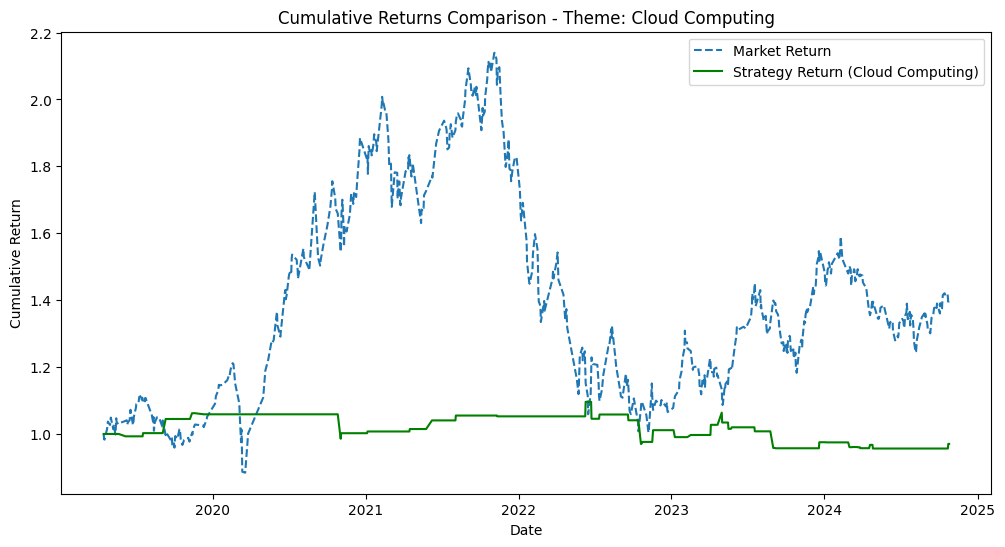

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


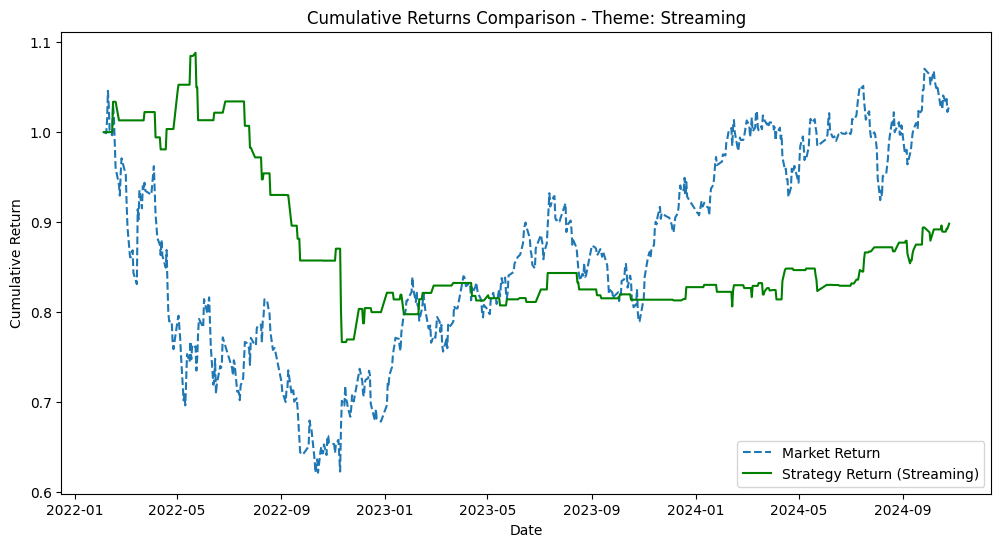

/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
/var/folders/7g/4mssxdl55xq2tp760ggl974m0000gn/T/ipykernel_26596/282162247.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)


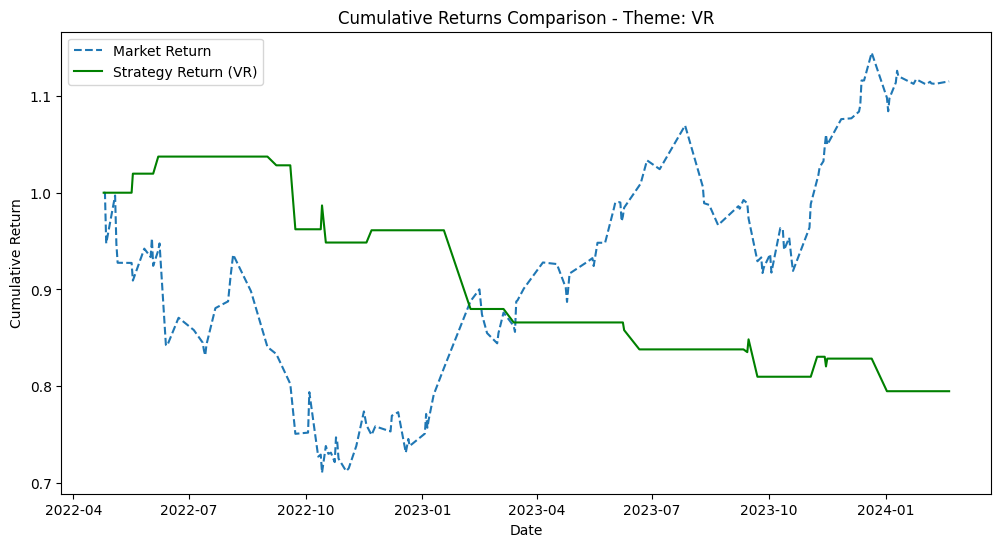

             Theme  Sharpe_Market  Sharpe_Strategy  Max_Drawdown_Market  \
0               AI       2.272511         0.519768            -0.436652   
1    Cybersecurity       0.945313        -0.579104            -0.338878   
2     Social Media       0.509032         0.221479            -0.686957   
3               EV       0.461403        -0.641761            -0.427692   
4      Transistors       1.228207        -0.731477            -0.453530   
5  Cloud Computing       0.523034        -0.067393            -0.530783   
6        Streaming       0.186677        -0.322996            -0.405447   
7               VR       0.649979        -2.023797            -0.289334   

   Max_Drawdown_Strategy  
0              -0.137591  
1              -0.298164  
2              -0.106581  
3              -0.255315  
4              -0.368731  
5              -0.127298  
6              -0.295248  
7              -0.233715  


In [37]:
from scipy.stats import zscore

def sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(252)

def max_drawdown(cumulative_returns):
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - running_max) / running_max
    return drawdowns.min()

results = []

for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue
    
    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    
    volume_df['date'] = pd.to_datetime(volume_df['date'])
    volume_df.sort_values('date', inplace=True)
    
    volume_df['theme_zscore'] = zscore(volume_df['theme_freq'])
    
    volume_df['saturation_level'] = np.where(volume_df['theme_zscore'] > 2, 'Overhyped',
                                     np.where(volume_df['theme_zscore'] < -1, 'Neglected', 'Neutral'))
    
    volume_df['signal'] = np.where(volume_df['saturation_level'] == 'Overhyped', -1,
                           np.where(volume_df['saturation_level'] == 'Neglected', 1, 0))
    
    volume_df['daily_return'] = volume_df['close'].pct_change()
    
    volume_df['strategy_return'] = volume_df['signal'].shift(1) * volume_df['daily_return']
    
    volume_df['cumulative_market_return'] = (1 + volume_df['daily_return']).cumprod()
    volume_df['cumulative_market_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
    
    volume_df['cumulative_strategy_return'] = (1 + volume_df['strategy_return']).cumprod()
    volume_df['cumulative_strategy_return'].iloc[0] = 1  # Ensure starting point is 1 (100%)
    
    sharpe_market = sharpe_ratio(volume_df['daily_return'].dropna())
    sharpe_strategy = sharpe_ratio(volume_df['strategy_return'].dropna())
    
    max_drawdown_market = max_drawdown(volume_df['cumulative_market_return'])
    max_drawdown_strategy = max_drawdown(volume_df['cumulative_strategy_return'])
    
    results.append({
        'Theme': t,
        'Sharpe_Market': sharpe_market,
        'Sharpe_Strategy': sharpe_strategy,
        'Max_Drawdown_Market': max_drawdown_market,
        'Max_Drawdown_Strategy': max_drawdown_strategy
    })
    
    plt.figure(figsize=(12, 6))
    plt.plot(volume_df['date'], volume_df['cumulative_market_return'], label='Market Return', linestyle='--')
    plt.plot(volume_df['date'], volume_df['cumulative_strategy_return'], label=f'Strategy Return ({t})', color='green')
    plt.title(f'Cumulative Returns Comparison - Theme: {t}')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()

summary_df = pd.DataFrame(results)
print(summary_df)

### Theme Momentum Strategy

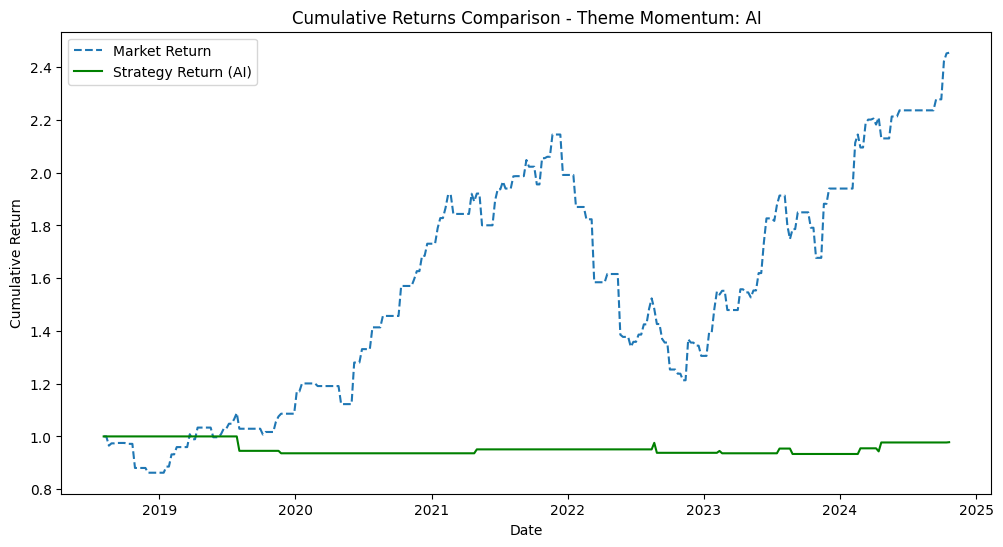

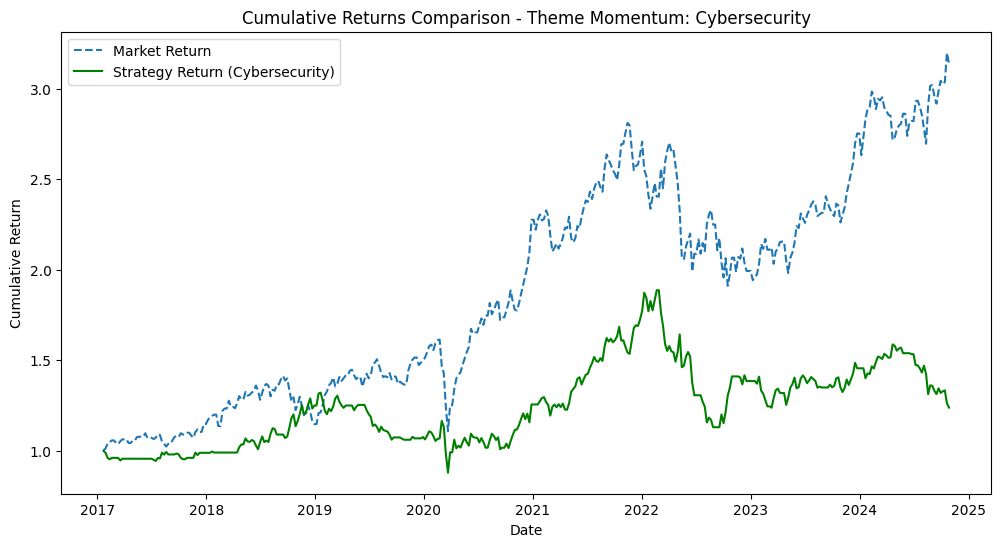

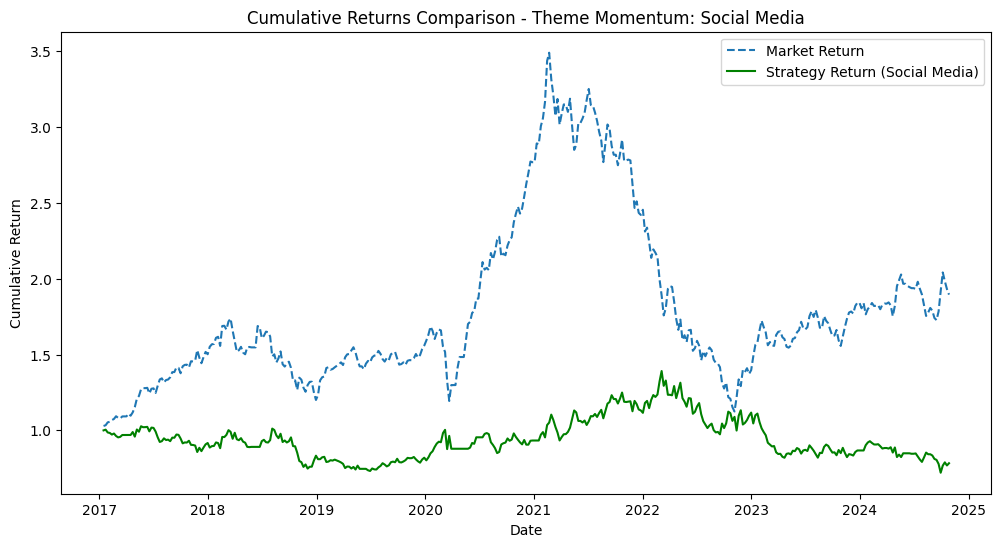

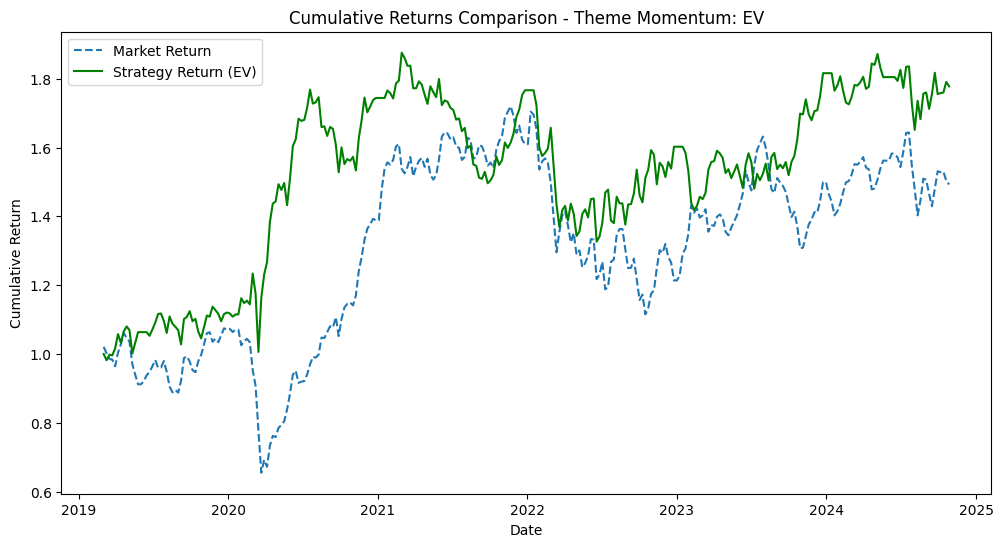

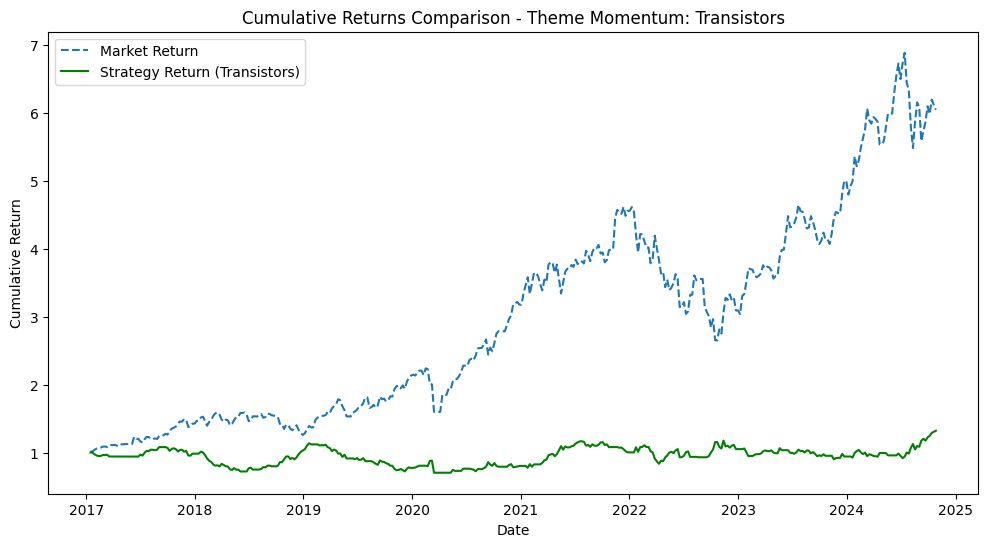

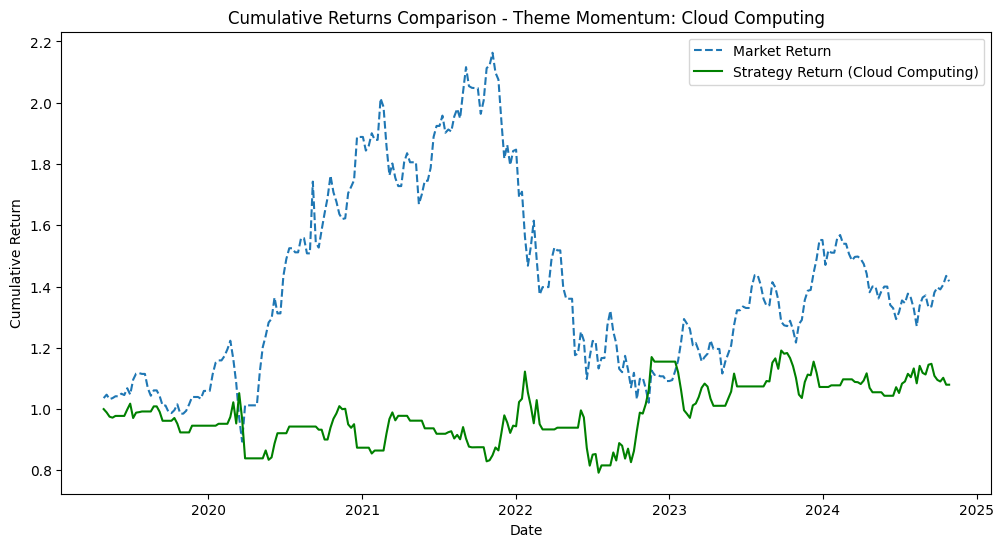

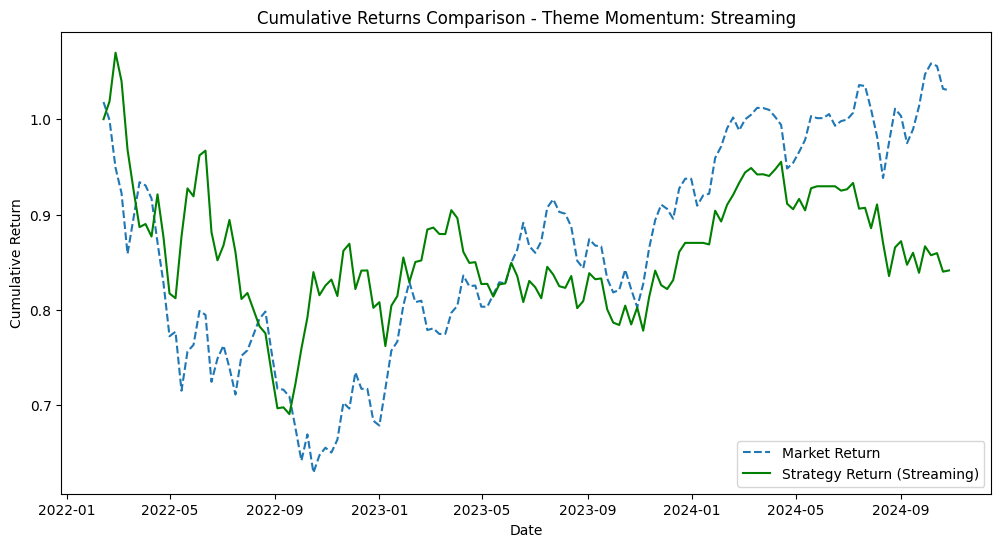

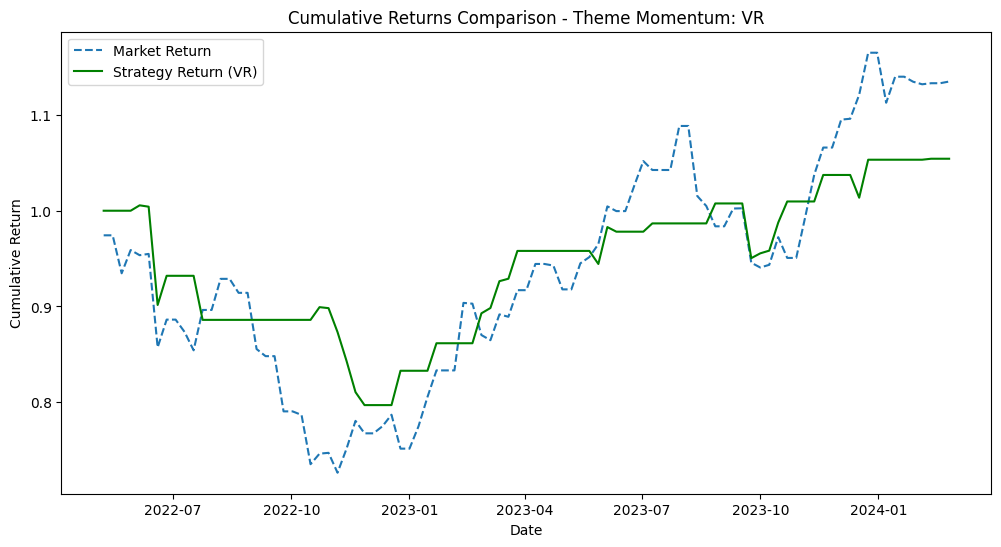

             Theme  Sharpe_Market  Sharpe_Strategy  Max_Drawdown_Market  \
0               AI       1.819290        -0.170903            -0.434452   
1    Cybersecurity       1.767499         0.524736            -0.320054   
2     Social Media       1.025343        -0.065900            -0.677871   
3               EV       0.943602         1.263108            -0.390737   
4      Transistors       2.213254         0.593535            -0.425877   
5  Cloud Computing       0.807075         0.378428            -0.528091   
6        Streaming       0.350017        -0.407743            -0.381878   
7               VR       0.955237         0.615574            -0.254454   

   Max_Drawdown_Strategy  
0              -0.066596  
1              -0.400697  
2              -0.481973  
3              -0.292775  
4              -0.381880  
5              -0.294098  
6              -0.354334  
7              -0.207456  


In [39]:
def sharpe_ratio(returns):
    return returns.mean() / returns.std() * np.sqrt(252)

def max_drawdown(cumulative_returns):

    cumulative_returns = cumulative_returns.dropna()
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - running_max) / running_max
    return drawdowns.min() if len(cumulative_returns) > 0 else np.nan

results = []

for t in theme_dict.keys():
    if t == "TNX" or t == "Market": 
        continue
    

    price_df = get_prices_data(t) 
    results_df = get_sentiment_data(t) 
    

    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    

    weekly_vol_df = volume_df.resample('W').mean() 
    

    weekly_vol_df['frequency_change'] = weekly_vol_df['theme_freq'].diff()
    

    weekly_vol_df['signal'] = np.where(weekly_vol_df['frequency_change'] > 0, 1, 
                                       np.where(weekly_vol_df['frequency_change'] < 0, -1, 0)) 
    

    weekly_vol_df['weekly_return'] = weekly_vol_df['close'].pct_change()
    

    weekly_vol_df['strategy_return'] = weekly_vol_df['signal'].shift(1) * weekly_vol_df['weekly_return'] 
    

    weekly_vol_df['cumulative_market_return'] = (1 + weekly_vol_df['weekly_return']).cumprod()
    weekly_vol_df['cumulative_strategy_return'] = (1 + weekly_vol_df['strategy_return']).cumprod()
    

    sharpe_market = sharpe_ratio(weekly_vol_df['weekly_return'].dropna())
    sharpe_strategy = sharpe_ratio(weekly_vol_df['strategy_return'].dropna())
    
    max_drawdown_market = max_drawdown(weekly_vol_df['cumulative_market_return'])
    max_drawdown_strategy = max_drawdown(weekly_vol_df['cumulative_strategy_return'])
    

    results.append({
        'Theme': t,
        'Sharpe_Market': sharpe_market,
        'Sharpe_Strategy': sharpe_strategy,
        'Max_Drawdown_Market': max_drawdown_market,
        'Max_Drawdown_Strategy': max_drawdown_strategy
    })
    

    plt.figure(figsize=(12, 6))
    plt.plot(weekly_vol_df.index, weekly_vol_df['cumulative_market_return'], label='Market Return', linestyle='--')
    plt.plot(weekly_vol_df.index, weekly_vol_df['cumulative_strategy_return'], label=f'Strategy Return ({t})', color='green')
    plt.title(f'Cumulative Returns Comparison - Theme Momentum: {t}')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()

summary_df = pd.DataFrame(results)
print(summary_df)

### Trading Strategy - Sentiment Weighted Momentum

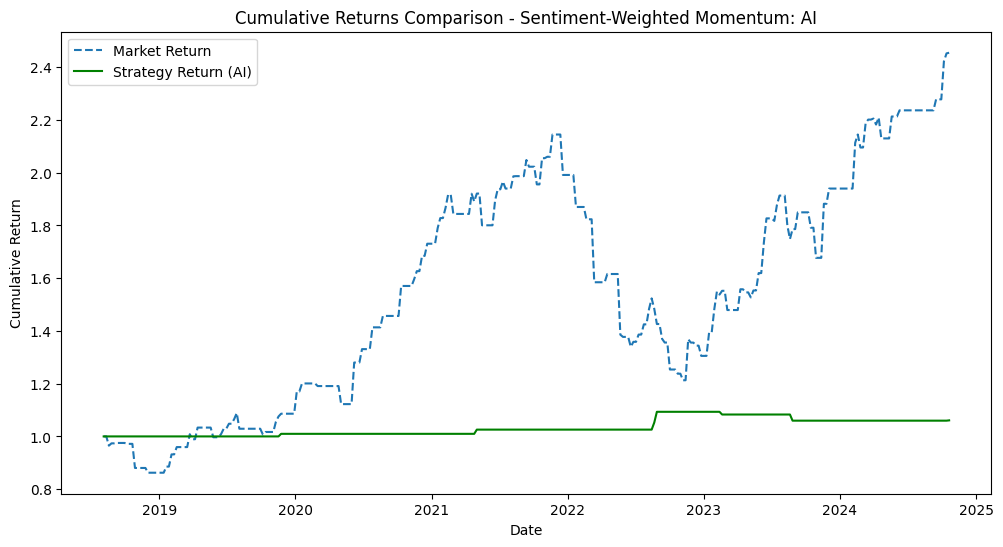

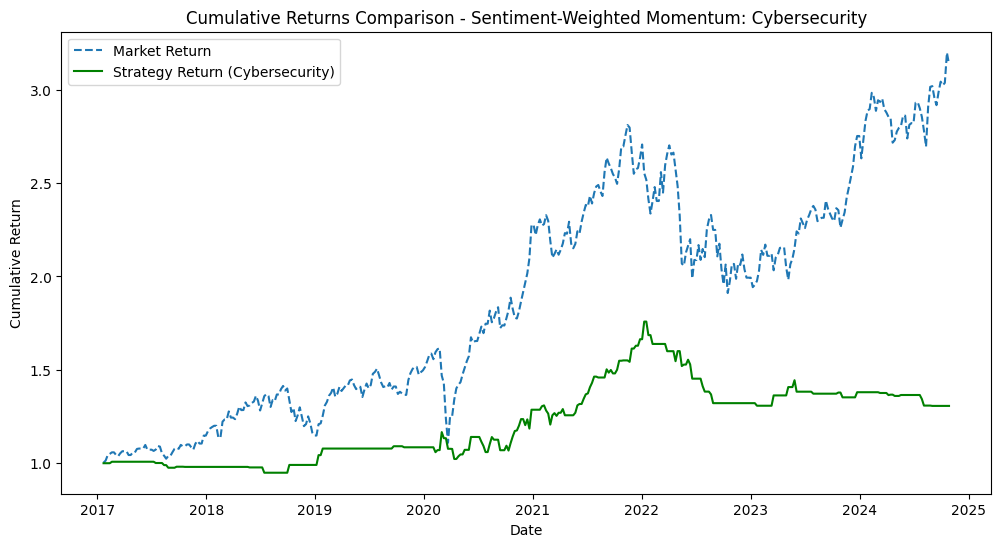

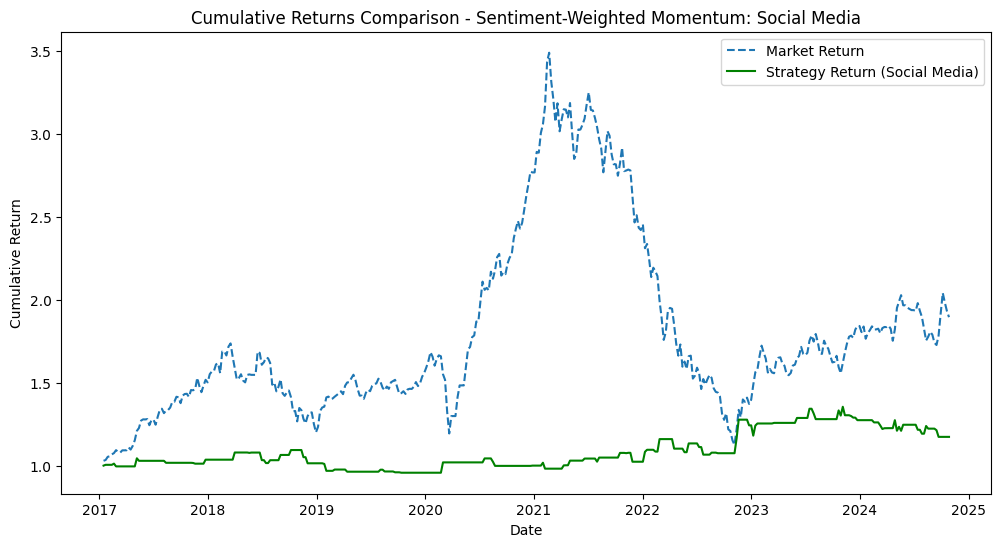

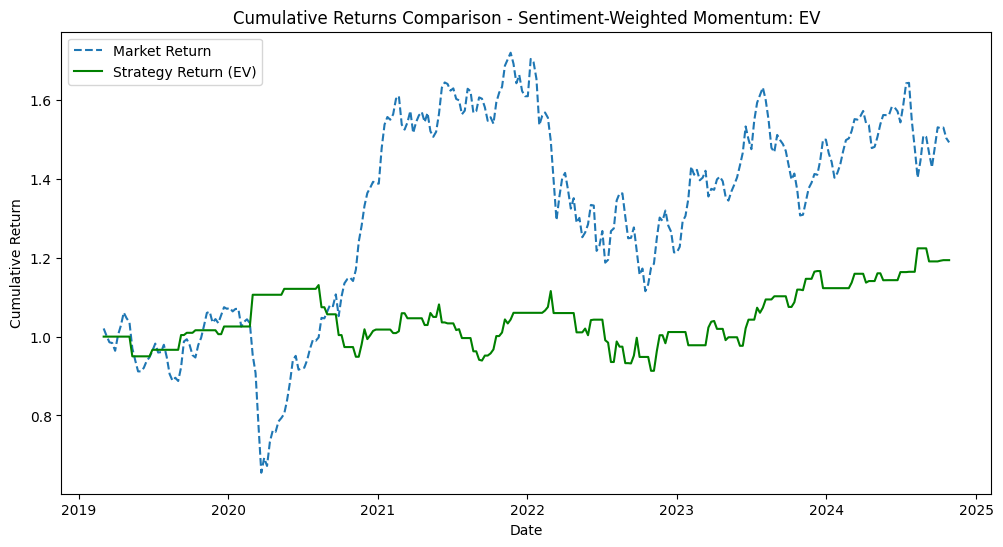

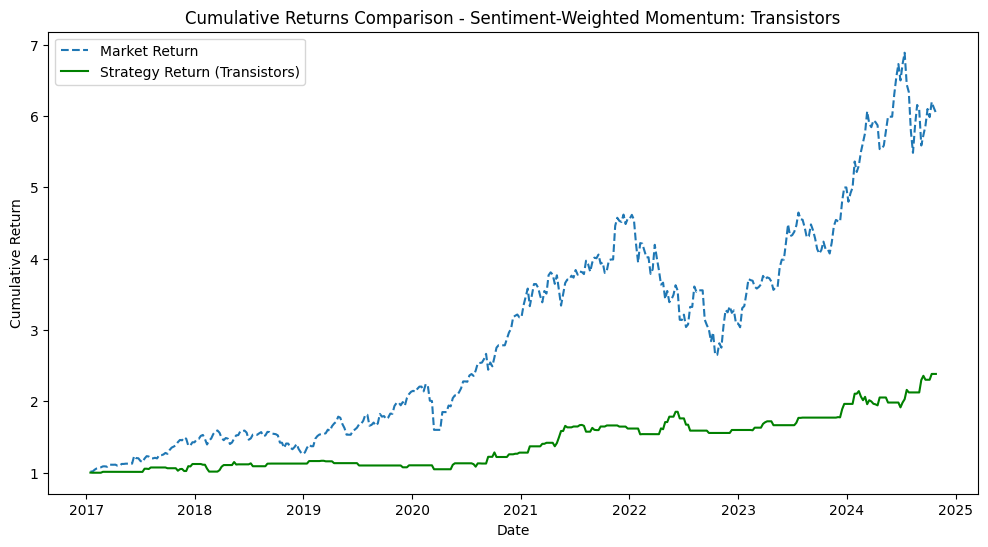

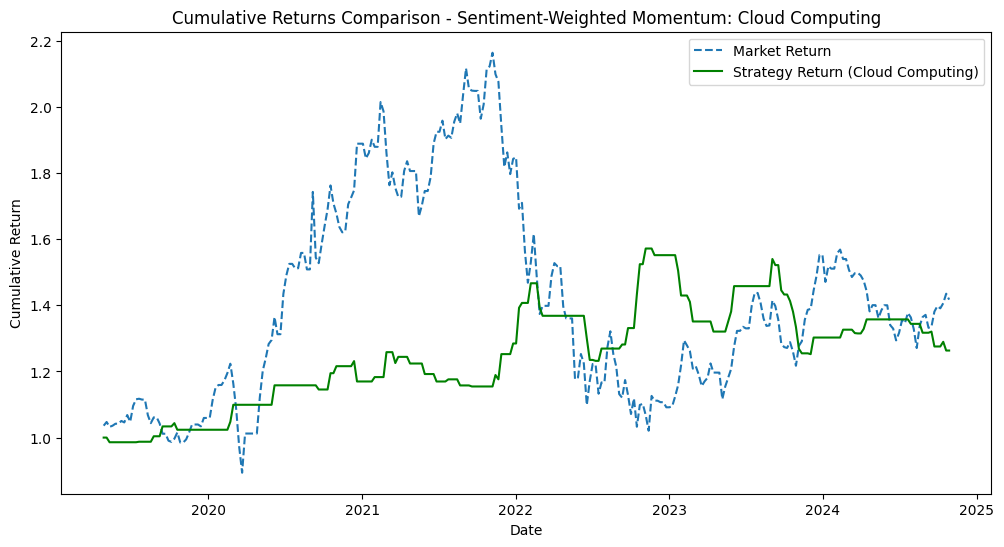

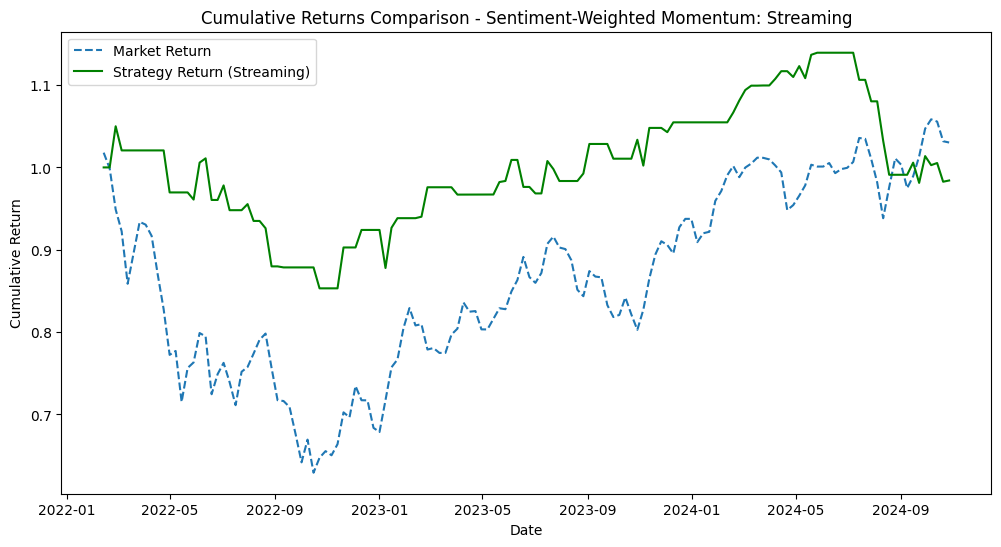

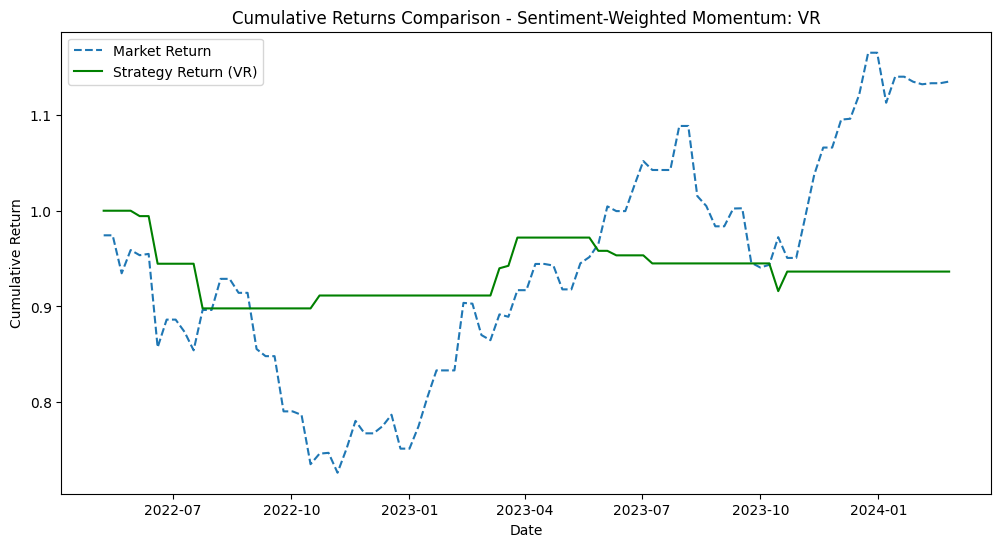

             Theme  Sharpe_Market  Sharpe_Strategy  Max_Drawdown_Market  \
0               AI       1.819290         0.961321            -0.434452   
1    Cybersecurity       1.767499         0.825399            -0.320054   
2     Social Media       1.025343         0.544281            -0.677871   
3               EV       0.943602         0.702135            -0.390737   
4      Transistors       2.213254         2.012027            -0.425877   
5  Cloud Computing       0.807075         0.900879            -0.528091   
6        Streaming       0.350017         0.042039            -0.381878   
7               VR       0.955237        -1.052996            -0.254454   

   Max_Drawdown_Strategy  
0              -0.030732  
1              -0.256788  
2              -0.134076  
3              -0.192359  
4              -0.160206  
5              -0.203168  
6              -0.187491  
7              -0.102000  


In [40]:
results = []

for t in theme_dict.keys():
    if t == "TNX" or t == "Market":
        continue
    
    price_df = get_prices_data(t)
    results_df = get_sentiment_data(t)
    
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    
    weekly_vol_df = volume_df.resample('W').mean()
    
    weekly_vol_df['frequency_change'] = weekly_vol_df['theme_freq'].diff()
    
    weekly_vol_df['sentiment_weighted_signal'] = weekly_vol_df['frequency_change'] * weekly_vol_df['sentiment_score']
    
    max_signal = weekly_vol_df['sentiment_weighted_signal'].abs().max()
    weekly_vol_df['scaled_signal'] = weekly_vol_df['sentiment_weighted_signal'] / max_signal
    
    weekly_vol_df['signal'] = np.where(weekly_vol_df['scaled_signal'] > 0.1, 1,
                               np.where(weekly_vol_df['scaled_signal'] < -0.1, -1, 0))

    weekly_vol_df['weekly_return'] = weekly_vol_df['close'].pct_change()
    
    weekly_vol_df['strategy_return'] = weekly_vol_df['signal'].shift(1) * weekly_vol_df['weekly_return']
    stop_loss = -0.05
    weekly_vol_df['strategy_return'] = np.where(weekly_vol_df['strategy_return'] < stop_loss, stop_loss, weekly_vol_df['strategy_return'])
    
    weekly_vol_df['cumulative_market_return'] = (1 + weekly_vol_df['weekly_return']).cumprod()
    weekly_vol_df['cumulative_strategy_return'] = (1 + weekly_vol_df['strategy_return']).cumprod()
    
    sharpe_market = sharpe_ratio(weekly_vol_df['weekly_return'].dropna())
    sharpe_strategy = sharpe_ratio(weekly_vol_df['strategy_return'].dropna())
    
    max_drawdown_market = max_drawdown(weekly_vol_df['cumulative_market_return'])
    max_drawdown_strategy = max_drawdown(weekly_vol_df['cumulative_strategy_return'])
    
    results.append({
        'Theme': t,
        'Sharpe_Market': sharpe_market,
        'Sharpe_Strategy': sharpe_strategy,
        'Max_Drawdown_Market': max_drawdown_market,
        'Max_Drawdown_Strategy': max_drawdown_strategy
    })
    
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_vol_df.index, weekly_vol_df['cumulative_market_return'], label='Market Return', linestyle='--')
    plt.plot(weekly_vol_df.index, weekly_vol_df['cumulative_strategy_return'], label=f'Strategy Return ({t})', color='green')
    plt.title(f'Cumulative Returns Comparison - Sentiment-Weighted Momentum: {t}')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()
summary_df = pd.DataFrame(results)
print(summary_df)

### Sentiment-Momentum Strategy

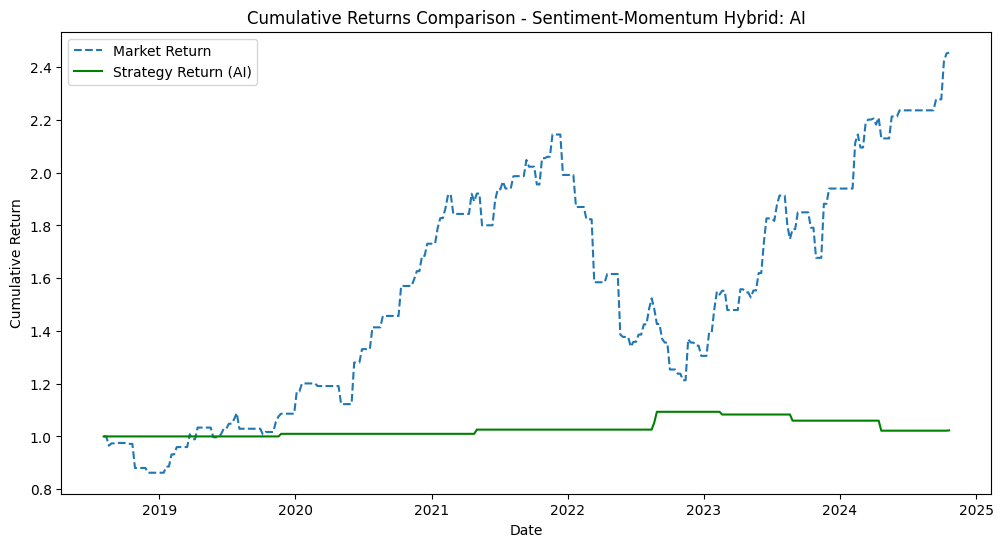

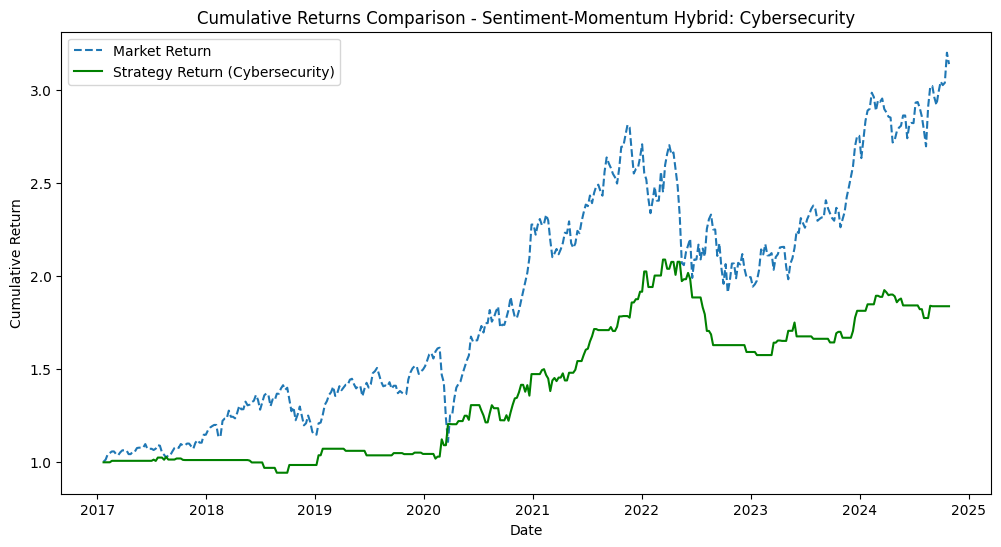

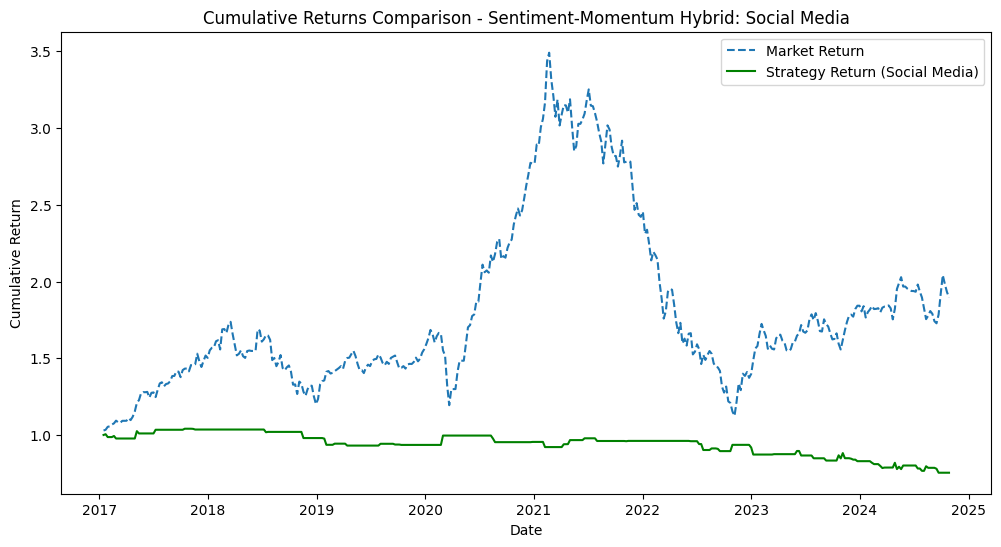

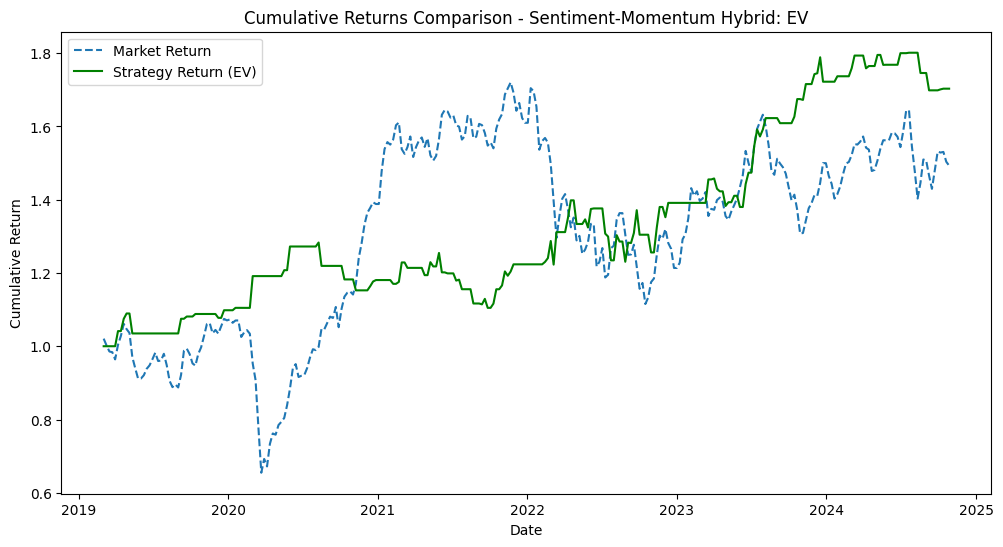

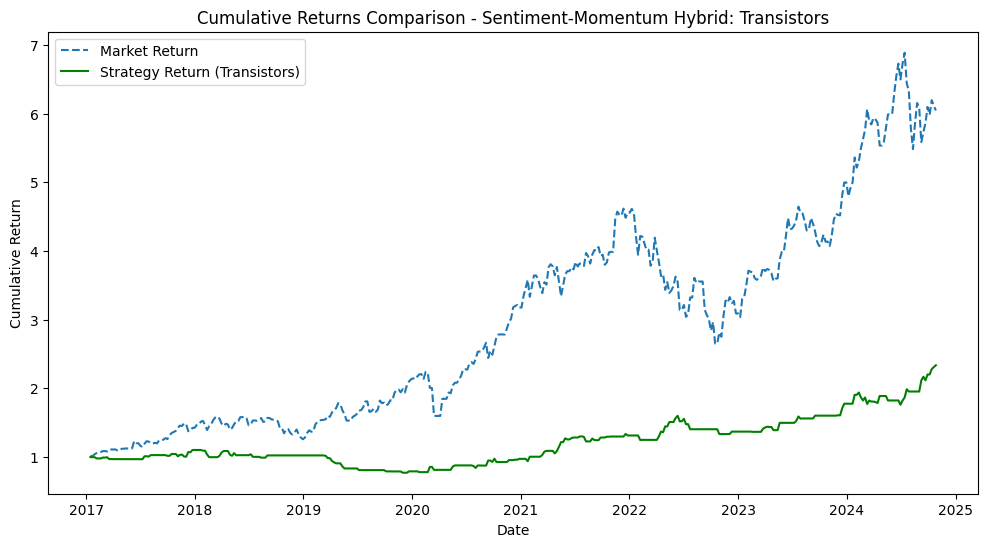

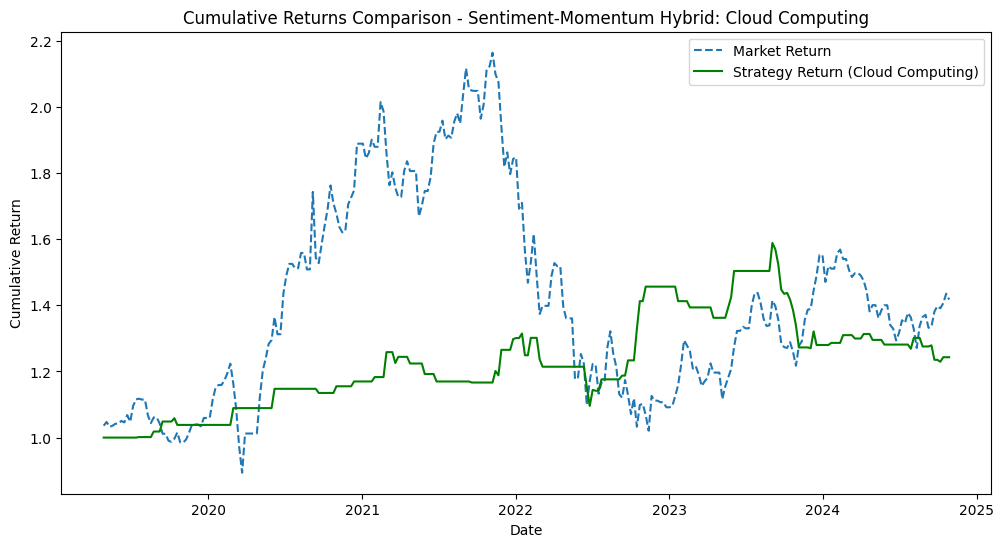

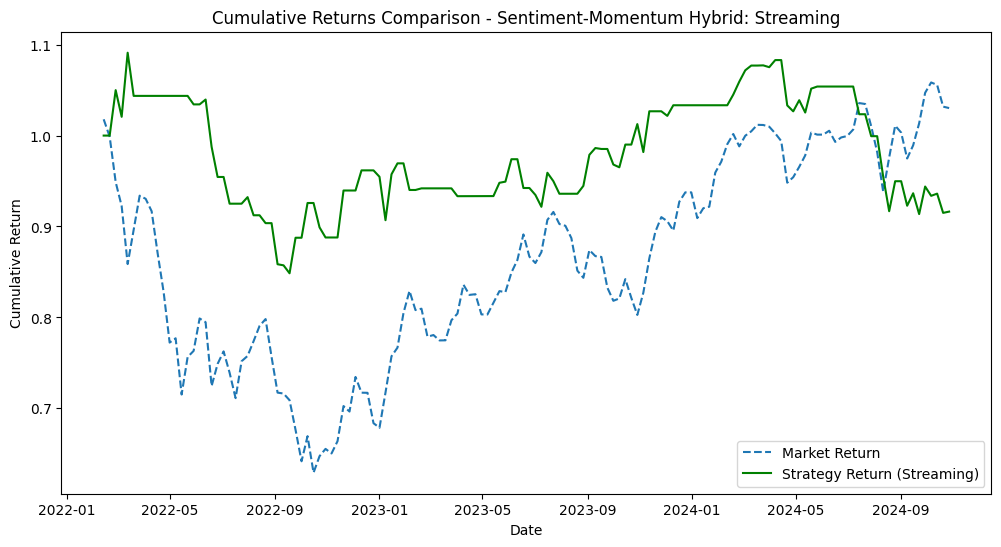

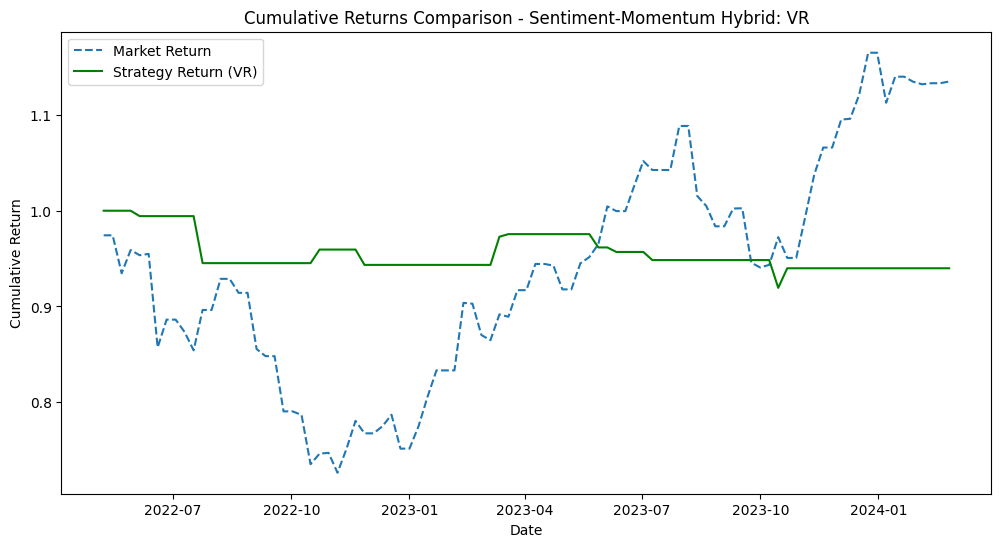

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for t in theme_dict.keys():
    if t == "TNX" or t == "Market":  # Skip irrelevant themes
        continue
    
    # Fetch price and sentiment data
    price_df = get_prices_data(t)  # Assuming this returns a DataFrame with 'date' and 'close' columns
    results_df = get_sentiment_data(t)  # Assuming this returns a DataFrame with 'date', 'theme_frequency', 'positive_count', 'negative_count'
    
    # Merge data on 'date' and set the index
    volume_df = pd.merge(price_df, results_df, on='date', how='inner')
    volume_df.set_index('date', inplace=True)
    
    # Resample data to weekly frequency
    weekly_vol_df = volume_df.resample('W').mean()
    
    # Step 1: Calculate Weekly Change in Theme Frequency
    weekly_vol_df['frequency_change'] = weekly_vol_df['theme_freq'].diff()
    
    # Step 2: Calculate Net Sentiment Ratio
    weekly_vol_df['net_sentiment_ratio'] = (weekly_vol_df['positive'] - weekly_vol_df['negative']) / (
        weekly_vol_df['positive'] + weekly_vol_df['negative'] + 1e-6  # Avoid division by zero
    )
    
    # Step 3: Sentiment-Adjusted Momentum Signal
    weekly_vol_df['sentiment_adjusted_signal'] = weekly_vol_df['frequency_change'] * weekly_vol_df['net_sentiment_ratio']
    
    # Step 4: Position Scaling
    max_signal = weekly_vol_df['sentiment_adjusted_signal'].abs().max()  # Normalize signal for scaling
    weekly_vol_df['scaled_signal'] = weekly_vol_df['sentiment_adjusted_signal'] / max_signal
    
    # Step 5: Generate Trading Signals
    weekly_vol_df['signal'] = np.where(weekly_vol_df['scaled_signal'] > 0.1, 1,  # Positive sentiment-adjusted momentum → Go long
                               np.where(weekly_vol_df['scaled_signal'] < -0.1, -1, 0))  # Negative sentiment-adjusted momentum → Go short
    
    # Step 6: Calculate Weekly Returns
    weekly_vol_df['weekly_return'] = weekly_vol_df['close'].pct_change()
    
    # Step 7: Apply Strategy Returns with Stop-Loss
    stop_loss = -0.05  # Example stop-loss threshold (5% weekly loss)
    weekly_vol_df['strategy_return'] = weekly_vol_df['signal'].shift(1) * weekly_vol_df['weekly_return']
    weekly_vol_df['strategy_return'] = np.where(weekly_vol_df['strategy_return'] < stop_loss, stop_loss, weekly_vol_df['strategy_return'])
    
    # Step 8: Calculate Cumulative Returns
    weekly_vol_df['cumulative_market_return'] = (1 + weekly_vol_df['weekly_return']).cumprod()
    weekly_vol_df['cumulative_strategy_return'] = (1 + weekly_vol_df['strategy_return']).cumprod()
    
    # Step 9: Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_vol_df.index, weekly_vol_df['cumulative_market_return'], label='Market Return', linestyle='--')
    plt.plot(weekly_vol_df.index, weekly_vol_df['cumulative_strategy_return'], label=f'Strategy Return ({t})', color='green')
    plt.title(f'Cumulative Returns Comparison - Sentiment-Momentum Hybrid: {t}')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()
